# HRV Parameter Extraction
This notebook is used for extracting HRV parameters from the peaks extracted in step 3.

To do:
- Calculate R-R intervals (done?)
- Plot Frequency domain for HRV values
- Extract SDNN
- Extract pNN50
- Save these values in the folder associated with the patient

## Initial setup

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pyarrow.feather as feather
from tqdm import tqdm

In [156]:
%run "4.0-HRV_Extraction_Function.ipynb"

In [4]:
root = 'G:\My Drive\Molecool\Databases\Database1'
#root = 'G:\.shortcut-targets-by-id\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\Molecool\Databases\Database1'

### Function definitions

In [146]:
def _check_valid(path):
    """Checks if the file is valid by checking the error flag in its metadata file"""
    with open(path + '/PeakMeta.json') as json_file:
        metaData = json.load(json_file)
        json_file.close()
        return not (metaData['Error Flag'])

In [164]:
def _save_parameters(para, path):
    """Save parameters in new json file with snippets"""
    with open((path + '/Parameters.json'), "w") as outfile:
        json.dump(para, outfile)
        outfile.close()

In [160]:
def _hrv_analysis(peaks):
    """Function takes a filepath, and extracts R-R interval values + HRV parameters in 
    frequency and time domains using functions from 4.0"""
    
    df = pd.read_feather(peaks + '\\PEAKS.ftr')
    print(type(df))
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    #df_HRV = RR_calculator(df)
    df_HRVt = _hrvreading(df)
    plt.title('HRV values for '  + peaks[-10:] + ' in patient ' + peaks[-23:-18])
    
    plt.subplot(1,2,2)
    df_HRVf = _fft(df_HRVt, 1000)
    plt.title('PSD for '  + peaks[-10:] + ' in patient ' + peaks[-23:-18])
    
    para = {}
    para['SDNN'] =  SDNN_calculator(df_HRVt) #Calculating the SDNN parameter
    para['RMSSD'] = RMSSD_calculator(df_HRVt) #Calculating the RMSSD parameter
    para['PNN50'] = PNN50_calculator(df_HRVt) #Calculating the PNN50 parameters

    para['LF'], para['HF'], para['LFHF'] = _LFHF(df_HRVf) #Calculating the frequency parameters
    return para

## Initial Testing on selected snippets

In [5]:
### Some good snippets... ###
patients = []
snippets = []
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0288\\holter\\Snippet000')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0288\\holter\\Snippet001')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\Databases\Database1\S0288\holter\Snippet002')

snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0300\\holter\\Snippet000')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0300\\holter\\Snippet001')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0300\\holter\\Snippet002')

snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0310\\holter\\Snippet000')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0310\\holter\\Snippet001')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0310\\holter\\Snippet002')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0310\\holter\\Snippet003')
snippets.append('G:\\.shortcut-targets-by-id\\1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD\\Molecool\\Databases\\Database1\\S0310\\holter\\Snippet004')

In [154]:
#for peaks in snippets:
   # _hrv_analysis(peaks)

## Initial Testing on updated Peak detection algorithm




  0%|                                                                                           | 0/57 [00:00<?, ?it/s]

In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


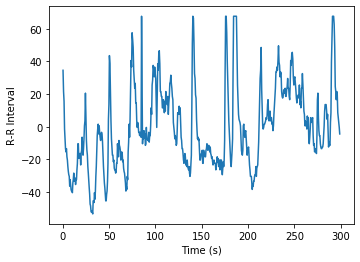

The SDNN is 25.029018212779278
The RMSSD is 9.043217553616685
The PNN50 is 0.17482517482517482 %
The absolute power of the Low Frequency band is 58.30736798734174
New formula being used
The absolute power of the High Frequency band is 30.17470147996057
The LF/HF is 1.9323262576786204



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


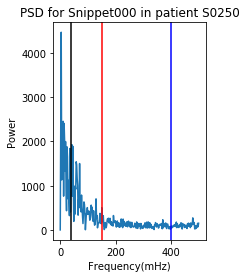

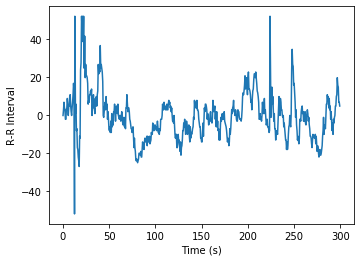

The SDNN is 12.31523398416542
The RMSSD is 8.193851809787965
The PNN50 is 0.3418803418803419 %
The absolute power of the Low Frequency band is 23.85683954753521
New formula being used
The absolute power of the High Frequency band is 28.0641878412376
The LF/HF is 0.850081238142224



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


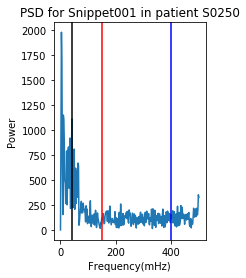

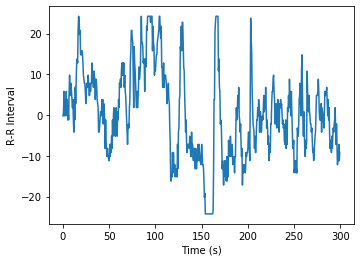




  4%|██▉                                                                                | 2/57 [00:01<00:38,  1.43it/s]

The SDNN is 10.89317538443801
The RMSSD is 4.095034286209227
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 18.230237901525477
New formula being used
The absolute power of the High Frequency band is 14.552666355863364
The LF/HF is 1.252707748238892



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


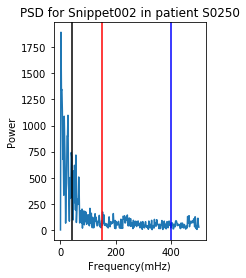

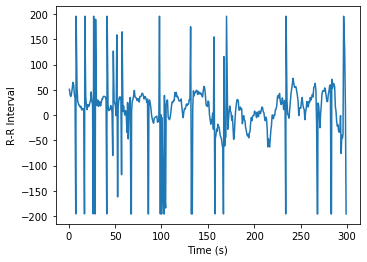




  7%|█████▊                                                                             | 4/57 [00:01<00:29,  1.78it/s]

The SDNN is 67.7735824463945
The RMSSD is 90.48231985832763
The PNN50 is 6.682577565632458 %
The absolute power of the Low Frequency band is 131.08057059120813
New formula being used
The absolute power of the High Frequency band is 299.67997640973795
The LF/HF is 0.43740183165253593



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


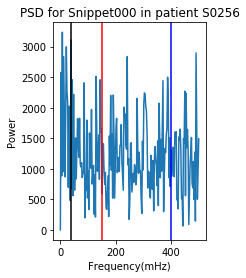

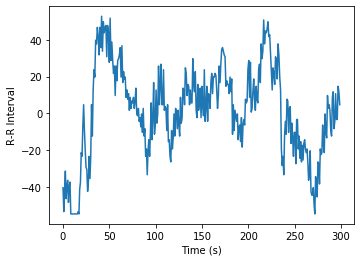

The SDNN is 24.863625202906835
The RMSSD is 11.80905947912858
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 27.01412325590239
New formula being used
The absolute power of the High Frequency band is 32.51985810957311
The LF/HF is 0.8306962215173395



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


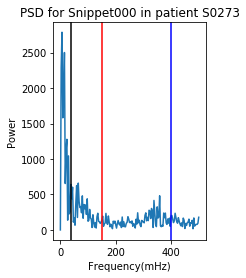

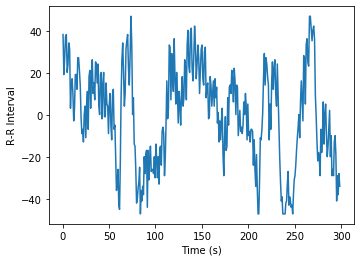

The SDNN is 22.998392531260894
The RMSSD is 12.721080036107152
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 36.41617986580984
New formula being used
The absolute power of the High Frequency band is 42.29414914151775
The LF/HF is 0.8610216922430567



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


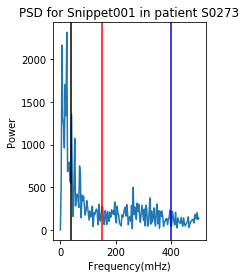

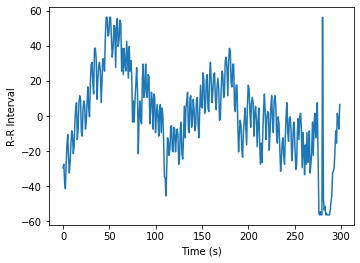

The SDNN is 24.057330621603228
The RMSSD is 14.772041942337207
The PNN50 is 0.29239766081871343 %
The absolute power of the Low Frequency band is 29.224195755060528
New formula being used
The absolute power of the High Frequency band is 50.08405705272167
The LF/HF is 0.5835029643125212



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


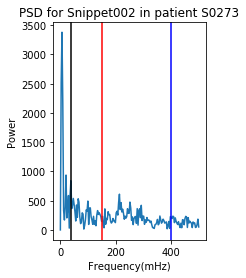

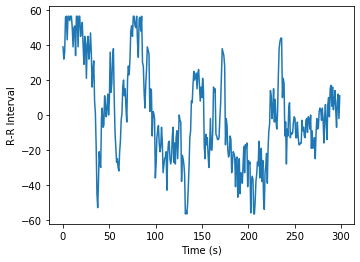

The SDNN is 27.715641796464876
The RMSSD is 12.393400043549544
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 35.13433513419388
New formula being used
The absolute power of the High Frequency band is 39.076866626100035
The LF/HF is 0.899108300324344



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


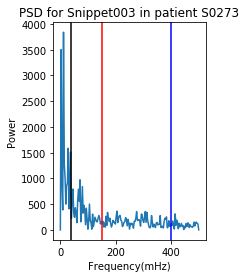

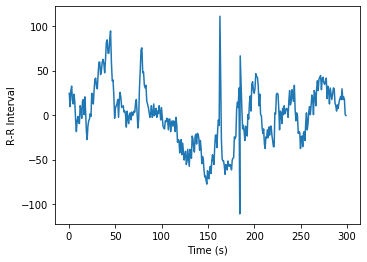




 11%|████████▋                                                                          | 6/57 [00:03<00:35,  1.42it/s]

The SDNN is 33.14272246394314
The RMSSD is 19.58243131544207
The PNN50 is 0.5555555555555556 %
The absolute power of the Low Frequency band is 41.08556217206564
New formula being used
The absolute power of the High Frequency band is 60.04416897241228
The LF/HF is 0.6842556550485809



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


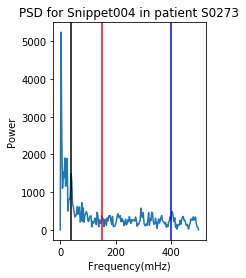

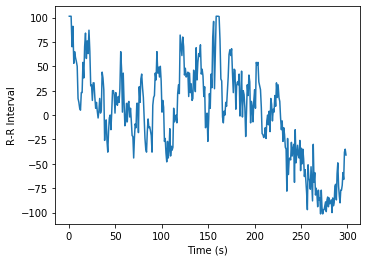

The SDNN is 47.900018132669295
The RMSSD is 20.269827643322103
The PNN50 is 1.4450867052023122 %
The absolute power of the Low Frequency band is 68.04306832381322
New formula being used
The absolute power of the High Frequency band is 61.03818064977264
The LF/HF is 1.114762392972253



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


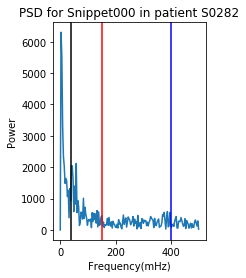

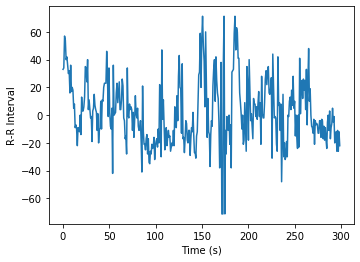




 12%|██████████▏                                                                        | 7/57 [00:04<00:36,  1.35it/s]

The SDNN is 23.595309158837317
The RMSSD is 23.732285924772423
The PNN50 is 3.684210526315789 %
The absolute power of the Low Frequency band is 44.32330588732487
New formula being used
The absolute power of the High Frequency band is 70.53161811155344
The LF/HF is 0.6284175391697767



In snippet folder Snippet002
In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


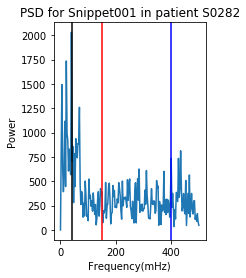

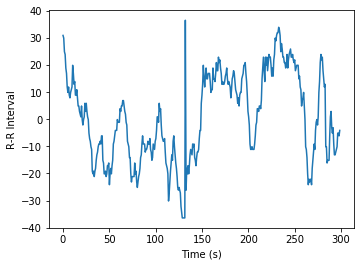

The SDNN is 16.070283894125065
The RMSSD is 5.83370806263721
The PNN50 is 0.24271844660194172 %
The absolute power of the Low Frequency band is 18.298420572156285
New formula being used
The absolute power of the High Frequency band is 18.966044979727105
The LF/HF is 0.9647989652937949



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


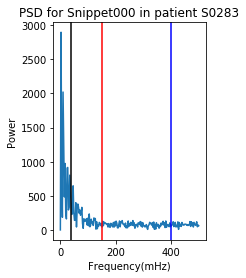

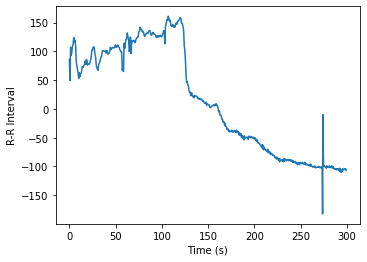

The SDNN is 91.06725506180395
The RMSSD is 11.156393910349324
The PNN50 is 0.38314176245210724 %
The absolute power of the Low Frequency band is 46.687288197923316
New formula being used
The absolute power of the High Frequency band is 42.57238098780801
The LF/HF is 1.0966567317739109



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


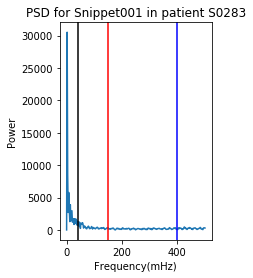

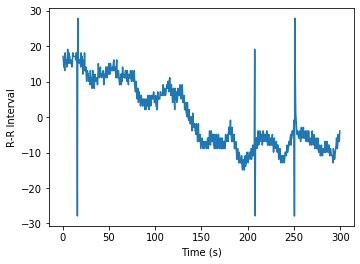

The SDNN is 9.67382789665792
The RMSSD is 4.665316800490439
The PNN50 is 0.2936857562408223 %
The absolute power of the Low Frequency band is 8.166061858136812
New formula being used
The absolute power of the High Frequency band is 21.062675430815943
The LF/HF is 0.3877029717786649



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


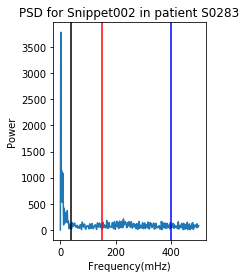

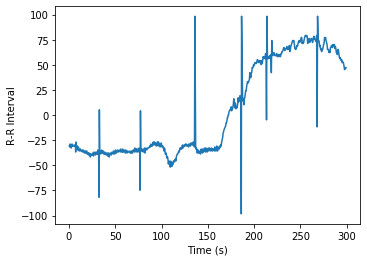




 14%|███████████▋                                                                       | 8/57 [00:06<00:52,  1.07s/it]

The SDNN is 45.93143905044813
The RMSSD is 15.336495389009993
The PNN50 is 0.9287925696594427 %
The absolute power of the Low Frequency band is 24.495091387072662
New formula being used
The absolute power of the High Frequency band is 61.192793769505954
The LF/HF is 0.4002937254235847



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


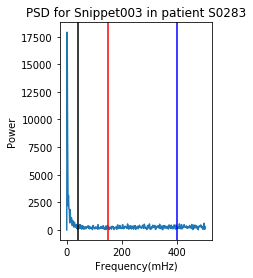

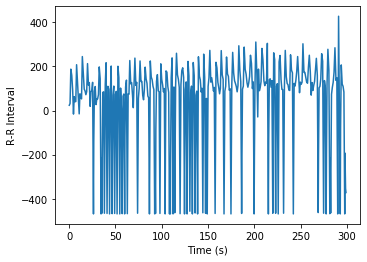

The SDNN is 233.5278666610782
The RMSSD is 277.1156913374378
The PNN50 is 37.735849056603776 %
The absolute power of the Low Frequency band is 498.46101529269987
New formula being used
The absolute power of the High Frequency band is 943.8678567799257
The LF/HF is 0.5281046618042871



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


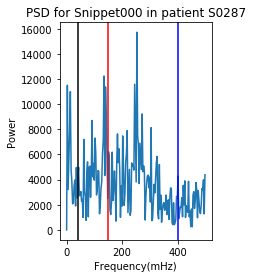

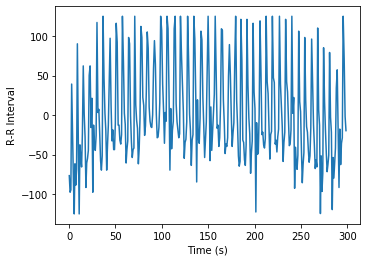

The SDNN is 60.529437945246954
The RMSSD is 66.7502462508695
The PNN50 is 17.981072555205046 %
The absolute power of the Low Frequency band is 106.52898618630557
New formula being used
The absolute power of the High Frequency band is 146.04593750738945
The LF/HF is 0.7294210849303189



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


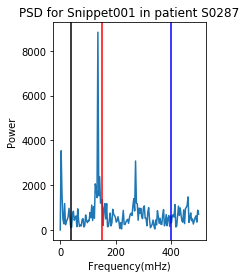

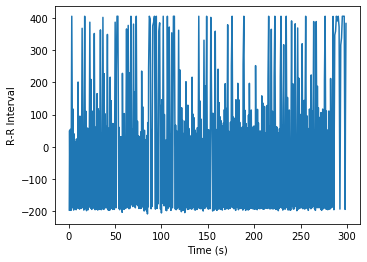




 16%|█████████████                                                                      | 9/57 [00:07<00:55,  1.16s/it]

The SDNN is 195.90018762555073
The RMSSD is 317.22776048039253
The PNN50 is 53.16901408450704 %
The absolute power of the Low Frequency band is 344.9181529337731
New formula being used
The absolute power of the High Frequency band is 844.4091081736194
The LF/HF is 0.4084728002043937



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


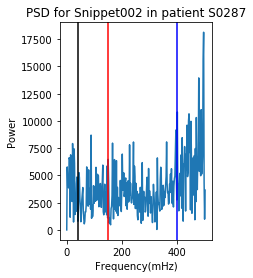

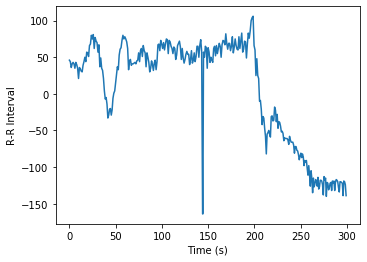

The SDNN is 73.34564800253276
The RMSSD is 20.93972790718872
The PNN50 is 0.31545741324921134 %
The absolute power of the Low Frequency band is 62.13204599648549
New formula being used
The absolute power of the High Frequency band is 79.57990149953285
The LF/HF is 0.7807504762600167



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


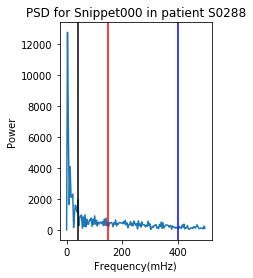

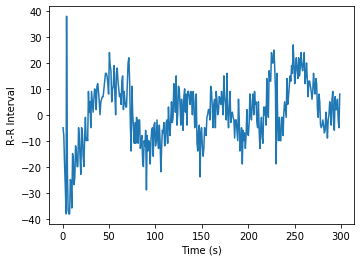

The SDNN is 11.878185866071174
The RMSSD is 9.720747886490518
The PNN50 is 0.2770083102493075 %
The absolute power of the Low Frequency band is 11.890883959530706
New formula being used
The absolute power of the High Frequency band is 30.686905830250954
The LF/HF is 0.38749048292150556



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


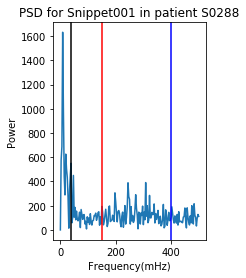

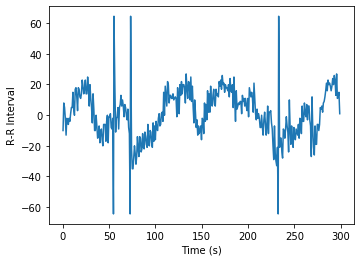




 18%|██████████████▍                                                                   | 10/57 [00:09<00:54,  1.16s/it]

The SDNN is 16.126897347394802
The RMSSD is 17.25733866589637
The PNN50 is 0.8241758241758242 %
The absolute power of the Low Frequency band is 14.231884718529885
New formula being used
The absolute power of the High Frequency band is 48.157161483226496
The LF/HF is 0.29552997477824683



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


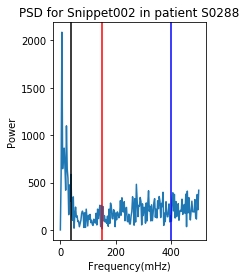

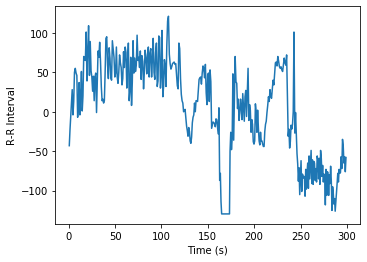

The SDNN is 62.2693672526727
The RMSSD is 27.471289665149687
The PNN50 is 2.6881720430107525 %
The absolute power of the Low Frequency band is 58.75609382621352
New formula being used
The absolute power of the High Frequency band is 86.62667982903554
The LF/HF is 0.678267872463463



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


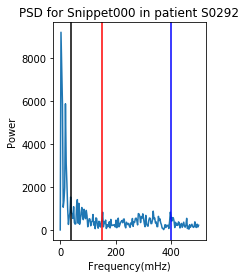

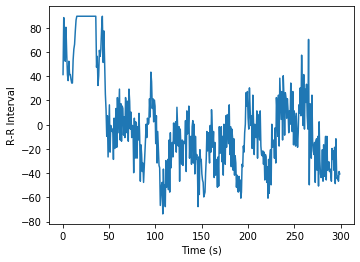




 19%|███████████████▊                                                                  | 11/57 [00:09<00:48,  1.06s/it]

The SDNN is 38.00181668744338
The RMSSD is 24.33625819055355
The PNN50 is 1.6990291262135921 %
The absolute power of the Low Frequency band is 41.93204227548132
New formula being used
The absolute power of the High Frequency band is 60.74949834221378
The LF/HF is 0.6902450788855892



In snippet folder Snippet000
In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


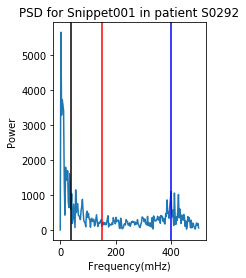

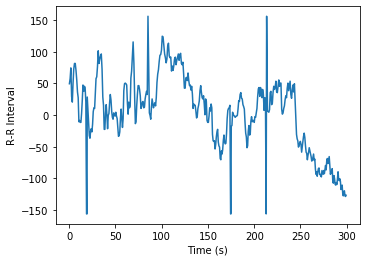

The SDNN is 59.34496000078096
The RMSSD is 30.383631266953454
The PNN50 is 0.9803921568627451 %
The absolute power of the Low Frequency band is 87.03243736830115
New formula being used
The absolute power of the High Frequency band is 110.24704380197498
The LF/HF is 0.7894310302290576



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


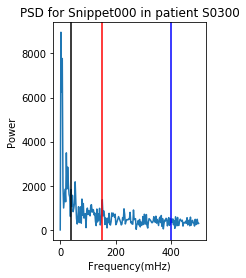

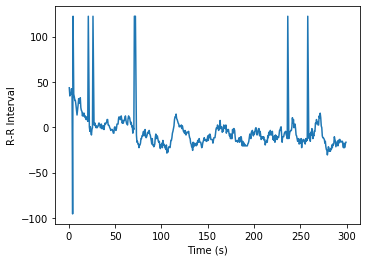

The SDNN is 19.396611774075
The RMSSD is 21.397699258489446
The PNN50 is 1.1278195488721803 %
The absolute power of the Low Frequency band is 40.22557422876492
New formula being used
The absolute power of the High Frequency band is 79.78591072261155
The LF/HF is 0.5041688922824425



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


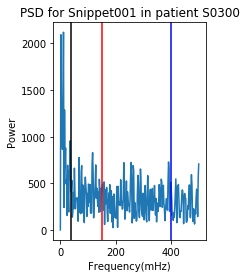

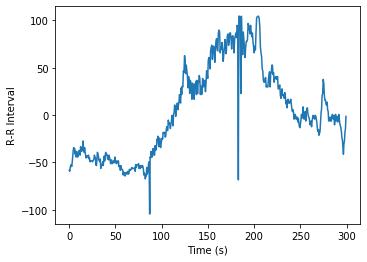




 23%|██████████████████▋                                                               | 13/57 [00:11<00:42,  1.05it/s]

The SDNN is 47.455135596222284
The RMSSD is 13.683222804609699
The PNN50 is 0.576923076923077 %
The absolute power of the Low Frequency band is 28.805761657998918
New formula being used
The absolute power of the High Frequency band is 51.43168224835158
The LF/HF is 0.5600781541405281



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


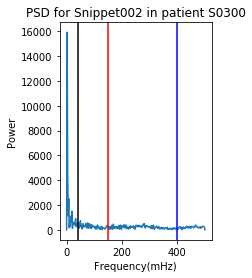

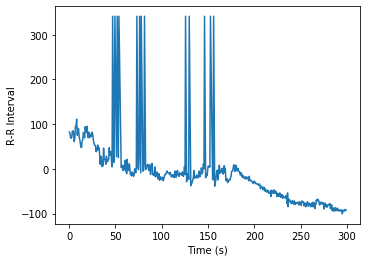

The SDNN is 73.43637896299458
The RMSSD is 78.00941280753177
The PNN50 is 2.5440313111545985 %
The absolute power of the Low Frequency band is 96.7535414355598
New formula being used
The absolute power of the High Frequency band is 255.96232334238738
The LF/HF is 0.3779991530477619



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


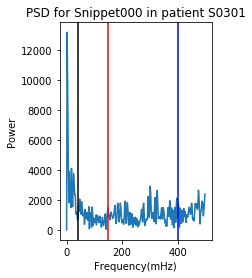

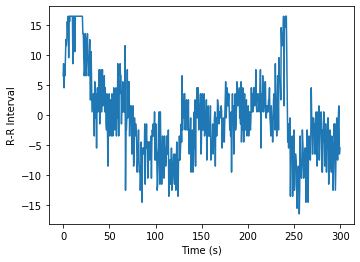

The SDNN is 6.8920988079453736
The RMSSD is 4.609998821542816
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 7.632749083351099
New formula being used
The absolute power of the High Frequency band is 18.48294591085004
The LF/HF is 0.41296171725906783



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


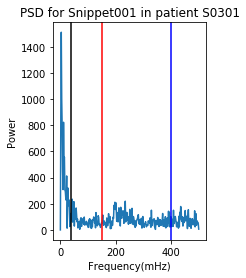

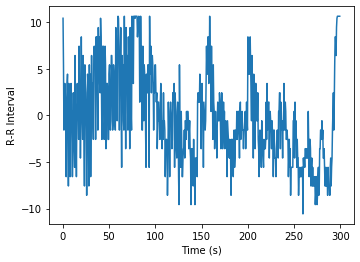




 25%|████████████████████▏                                                             | 14/57 [00:13<00:50,  1.17s/it]

The SDNN is 4.854866559788888
The RMSSD is 4.0746962748069695
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 5.535562492910159
New formula being used
The absolute power of the High Frequency band is 15.883248602894689
The LF/HF is 0.34851576219120023



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


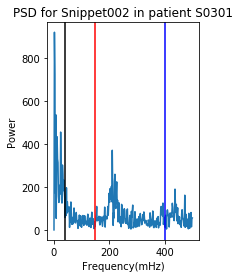

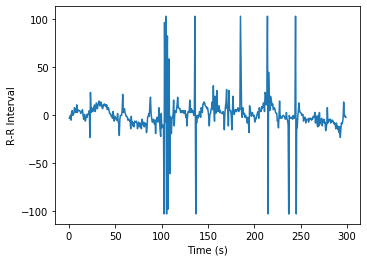




 26%|█████████████████████▌                                                            | 15/57 [00:13<00:40,  1.03it/s]

The SDNN is 20.13757005129636
The RMSSD is 31.02805698866379
The PNN50 is 2.88659793814433 %
The absolute power of the Low Frequency band is 32.110896923310165
New formula being used
The absolute power of the High Frequency band is 96.71362644846472
The LF/HF is 0.332020399839116



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


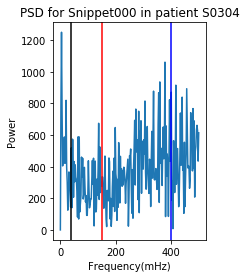

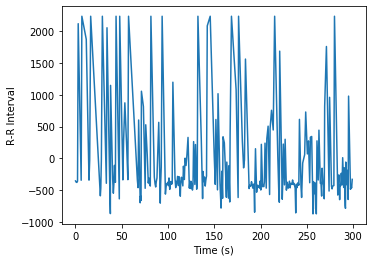




 28%|███████████████████████                                                           | 16/57 [00:13<00:32,  1.26it/s]

The SDNN is 742.1244780029651
The RMSSD is 1026.209898953951
The PNN50 is 45.09090909090909 %
The absolute power of the Low Frequency band is 1127.255947749702
New formula being used
The absolute power of the High Frequency band is 2617.5203071875912
The LF/HF is 0.43065795694280146



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


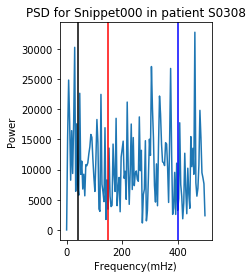

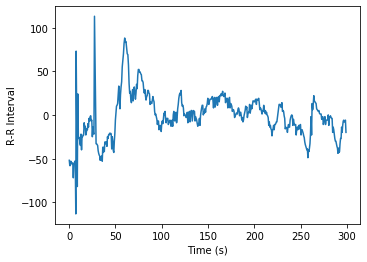

The SDNN is 25.394727408744096
The RMSSD is 15.735519812956639
The PNN50 is 0.6 %
The absolute power of the Low Frequency band is 28.99651008539869
New formula being used
The absolute power of the High Frequency band is 57.61557834670814
The LF/HF is 0.5032755188346626



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


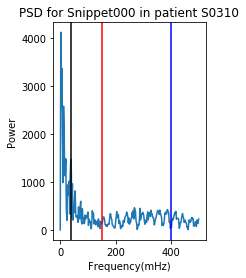

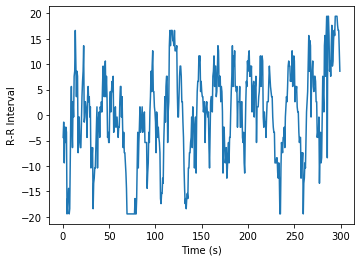

The SDNN is 9.086733161682446
The RMSSD is 4.89101620202024
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 15.563916502489898
New formula being used
The absolute power of the High Frequency band is 17.972171541811043
The LF/HF is 0.8660008873319229



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


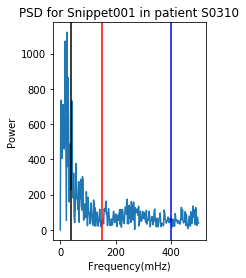

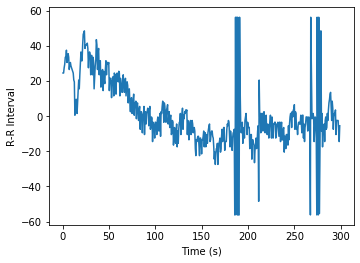

The SDNN is 18.944576451499483
The RMSSD is 19.16672530587698
The PNN50 is 1.5533980582524272 %
The absolute power of the Low Frequency band is 22.321797494182224
New formula being used
The absolute power of the High Frequency band is 62.12281527894405
The LF/HF is 0.359317223373616



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


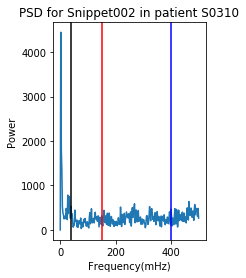

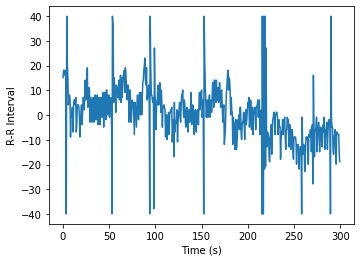

The SDNN is 11.574357421866411
The RMSSD is 14.620165472364281
The PNN50 is 1.6981132075471699 %
The absolute power of the Low Frequency band is 18.457924654460243
New formula being used
The absolute power of the High Frequency band is 50.926983599402334
The LF/HF is 0.36243899304251864



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


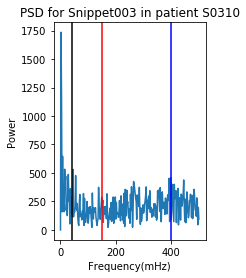

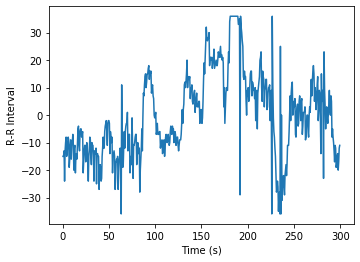




 30%|████████████████████████▍                                                         | 17/57 [00:16<00:52,  1.31s/it]

The SDNN is 15.278352373563711
The RMSSD is 9.469593412619579
The PNN50 is 0.5703422053231939 %
The absolute power of the Low Frequency band is 15.950538390429625
New formula being used
The absolute power of the High Frequency band is 33.98151094018613
The LF/HF is 0.46938873372951484



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


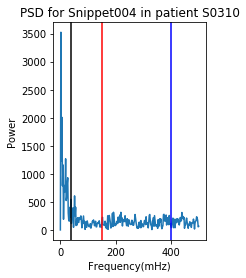

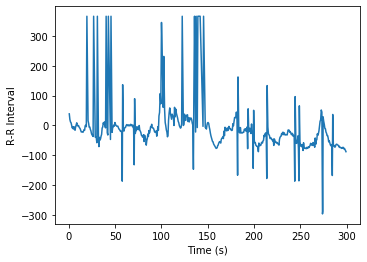




 32%|█████████████████████████▉                                                        | 18/57 [00:16<00:40,  1.05s/it]

The SDNN is 80.86968421873547
The RMSSD is 98.16603891239156
The PNN50 is 5.371900826446281 %
The absolute power of the Low Frequency band is 143.83812950776115
New formula being used
The absolute power of the High Frequency band is 321.5950261386128
The LF/HF is 0.44726478277610093



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


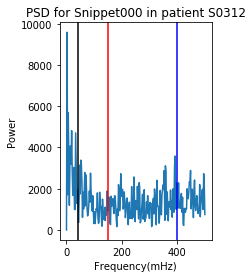

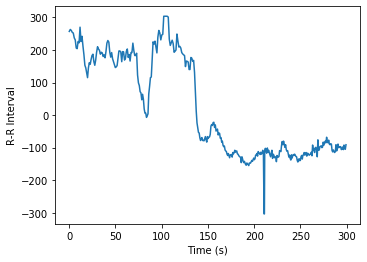

The SDNN is 146.8534049154301
The RMSSD is 21.3432125361144
The PNN50 is 1.639344262295082 %
The absolute power of the Low Frequency band is 100.5861076159855
New formula being used
The absolute power of the High Frequency band is 90.82204060162287
The LF/HF is 1.107507681502018



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


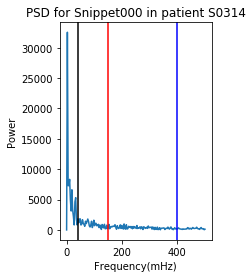

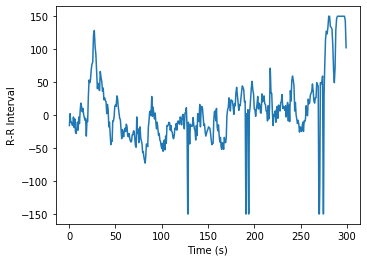




 33%|███████████████████████████▎                                                      | 19/57 [00:17<00:38,  1.02s/it]

The SDNN is 50.58029413789486
The RMSSD is 29.934195285500458
The PNN50 is 1.7241379310344827 %
The absolute power of the Low Frequency band is 99.5718617518495
New formula being used
The absolute power of the High Frequency band is 114.15970433984958
The LF/HF is 0.8722154838052789



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


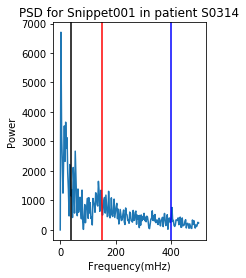

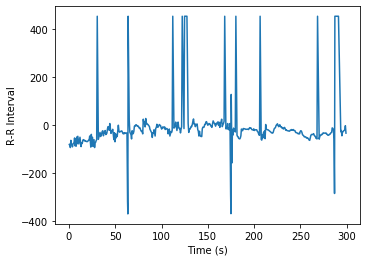




 35%|████████████████████████████▊                                                     | 20/57 [00:18<00:31,  1.18it/s]

The SDNN is 86.79663808029734
The RMSSD is 114.37368235646946
The PNN50 is 3.2537960954446854 %
The absolute power of the Low Frequency band is 193.8025506781327
New formula being used
The absolute power of the High Frequency band is 415.36077026025185
The LF/HF is 0.4665884805555955



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


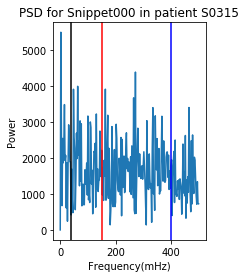

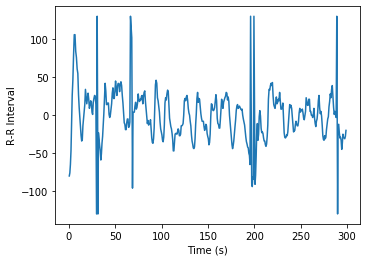

The SDNN is 34.005378763544044
The RMSSD is 35.867838409873734
The PNN50 is 1.834862385321101 %
The absolute power of the Low Frequency band is 71.33172899365978
New formula being used
The absolute power of the High Frequency band is 126.04688032781387
The LF/HF is 0.5659142757690252



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


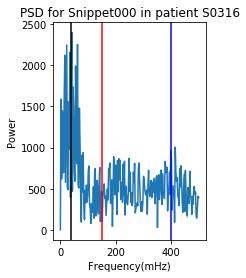

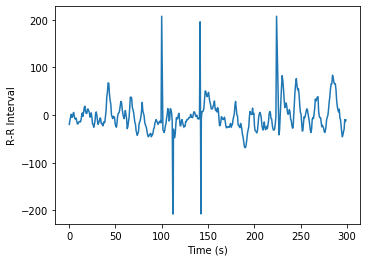

The SDNN is 35.09530214958943
The RMSSD is 35.91000567848905
The PNN50 is 1.1363636363636365 %
The absolute power of the Low Frequency band is 81.71166919885437
New formula being used
The absolute power of the High Frequency band is 118.82207150754593
The LF/HF is 0.6876809010493069



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


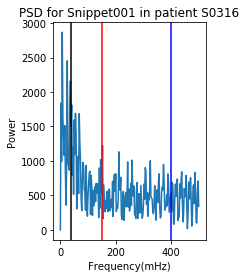

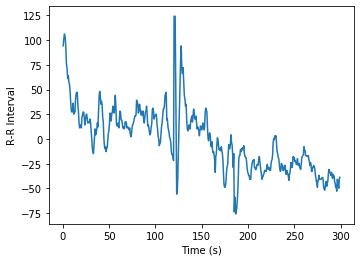

The SDNN is 31.764599353878463
The RMSSD is 12.517181425147921
The PNN50 is 0.20242914979757085 %
The absolute power of the Low Frequency band is 63.832406256608564
New formula being used
The absolute power of the High Frequency band is 56.77067844106391
The LF/HF is 1.1243904073275386



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


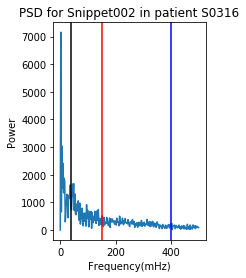

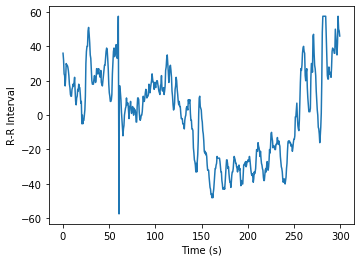




 37%|██████████████████████████████▏                                                   | 21/57 [00:20<00:40,  1.14s/it]

The SDNN is 25.694095156894978
The RMSSD is 7.452013705906374
The PNN50 is 0.18248175182481752 %
The absolute power of the Low Frequency band is 33.78203364621056
New formula being used
The absolute power of the High Frequency band is 27.412665730132854
The LF/HF is 1.2323512780107444



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


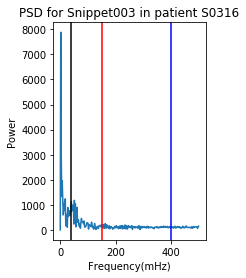

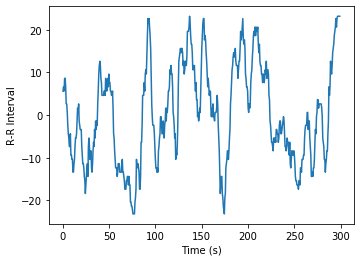

The SDNN is 11.461758704297349
The RMSSD is 2.4299068748211736
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 13.644715409013408
New formula being used
The absolute power of the High Frequency band is 7.906564389218713
The LF/HF is 1.725745183030339



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


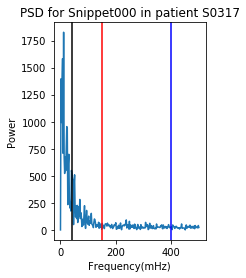

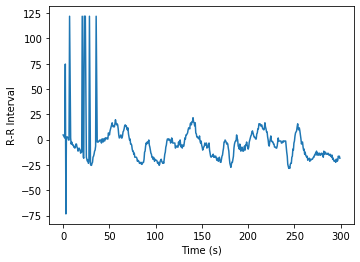

The SDNN is 18.26200675048791
The RMSSD is 20.39390537056564
The PNN50 is 1.3461538461538463 %
The absolute power of the Low Frequency band is 36.04945526179513
New formula being used
The absolute power of the High Frequency band is 79.97139045343138
The LF/HF is 0.45077939819975127



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


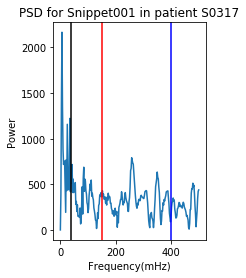

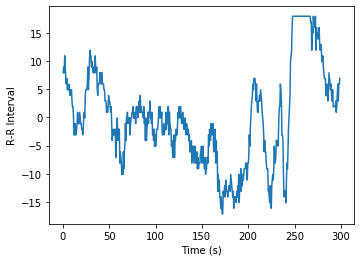

The SDNN is 8.489677452203985
The RMSSD is 1.997742842369831
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 6.224660722633622
New formula being used
The absolute power of the High Frequency band is 5.815952316788469
The LF/HF is 1.0702736858184627



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


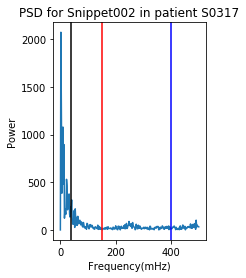

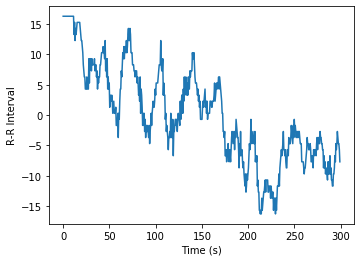




 39%|███████████████████████████████▋                                                  | 22/57 [00:21<00:47,  1.36s/it]

The SDNN is 7.90521308343738
The RMSSD is 1.7710192837990637
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 5.69699439627886
New formula being used
The absolute power of the High Frequency band is 6.541812547149034
The LF/HF is 0.8708587039476771



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


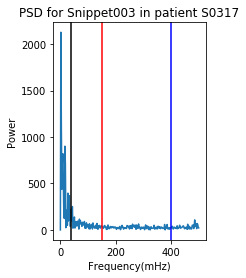

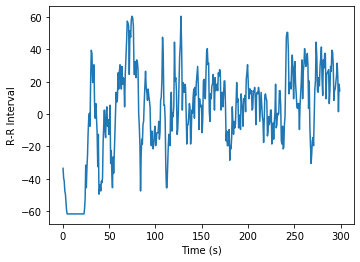

The SDNN is 27.93454181555988
The RMSSD is 12.12973047929596
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 51.59609357763048
New formula being used
The absolute power of the High Frequency band is 42.11416230464125
The LF/HF is 1.2251482815780539



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


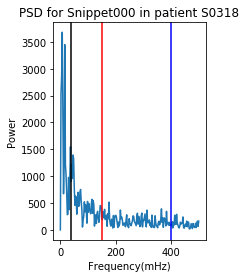

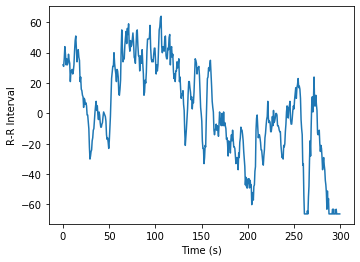

The SDNN is 32.18564559200716
The RMSSD is 6.649397520669182
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 36.636922902682876
New formula being used
The absolute power of the High Frequency band is 25.5357240002453
The LF/HF is 1.4347320993260633



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


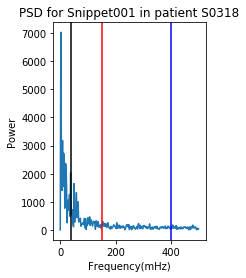

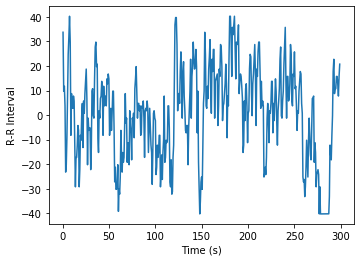




 40%|█████████████████████████████████                                                 | 23/57 [00:23<00:46,  1.36s/it]

The SDNN is 18.74926818543151
The RMSSD is 11.423795241815055
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 40.300582237084576
New formula being used
The absolute power of the High Frequency band is 40.755913023444634
The LF/HF is 0.9888278595035245



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


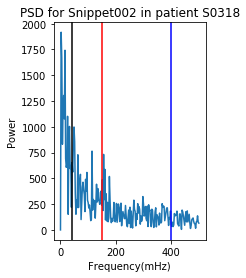

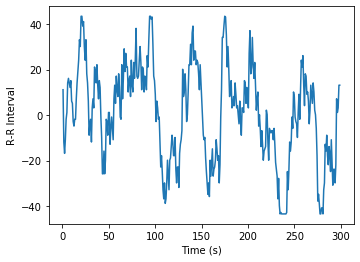

The SDNN is 21.179674637229393
The RMSSD is 8.78802679956425
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 30.11016327036127
New formula being used
The absolute power of the High Frequency band is 26.11866950886958
The LF/HF is 1.1528214812066222



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


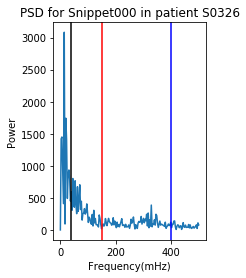

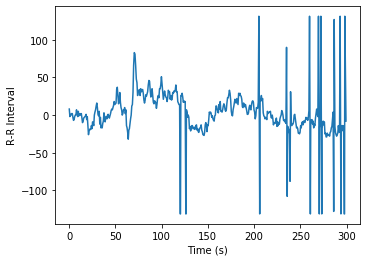

The SDNN is 33.299621618257284
The RMSSD is 44.3049171884794
The PNN50 is 3.68763557483731 %
The absolute power of the Low Frequency band is 55.028926036639476
New formula being used
The absolute power of the High Frequency band is 138.92457979298848
The LF/HF is 0.3961064781958533



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


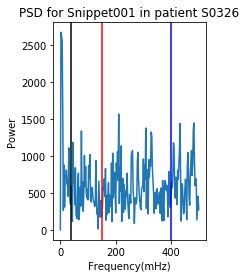

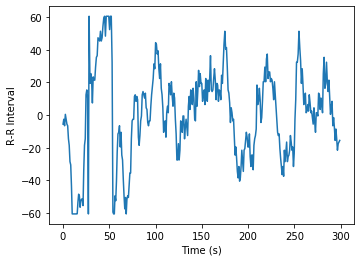




 42%|██████████████████████████████████▌                                               | 24/57 [00:24<00:44,  1.34s/it]

The SDNN is 27.74905042914807
The RMSSD is 12.79442237396525
The PNN50 is 0.2801120448179272 %
The absolute power of the Low Frequency band is 43.020653265363215
New formula being used
The absolute power of the High Frequency band is 37.35273423622184
The LF/HF is 1.1517404052216627



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


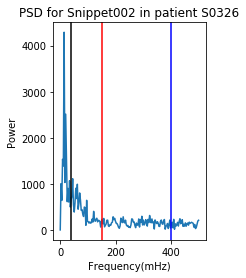

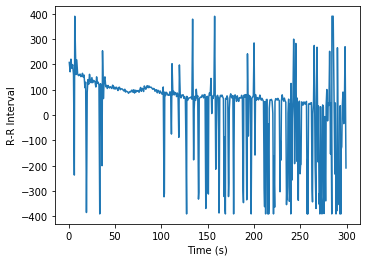

The SDNN is 179.64392395187284
The RMSSD is 203.43966721243132
The PNN50 is 22.248803827751196 %
The absolute power of the Low Frequency band is 382.8604962507697
New formula being used
The absolute power of the High Frequency band is 702.5671899871612
The LF/HF is 0.5449450269059193



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


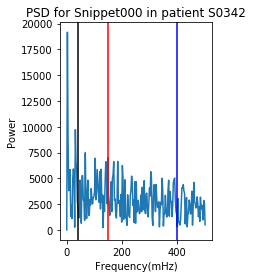

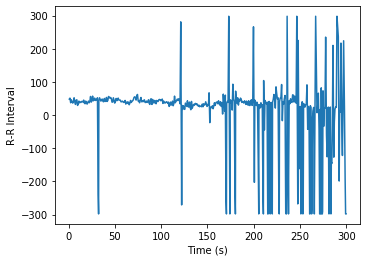




 49%|████████████████████████████████████████▎                                         | 28/57 [00:25<00:29,  1.00s/it]

The SDNN is 113.90354700864226
The RMSSD is 137.37211669364544
The PNN50 is 12.646370023419204 %
The absolute power of the Low Frequency band is 245.3034563236388
New formula being used
The absolute power of the High Frequency band is 495.7655393555745
The LF/HF is 0.4947973121377069



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


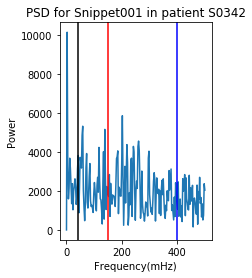

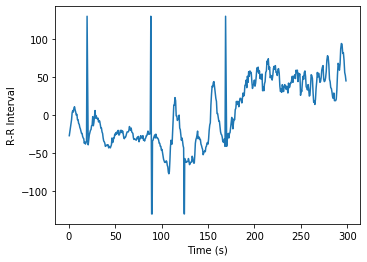




 51%|█████████████████████████████████████████▋                                        | 29/57 [00:25<00:23,  1.20it/s]

The SDNN is 42.97672183696859
The RMSSD is 22.87089539173728
The PNN50 is 1.059322033898305 %
The absolute power of the Low Frequency band is 55.369099140898264
New formula being used
The absolute power of the High Frequency band is 82.44587113044479
The LF/HF is 0.6715812251324751



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


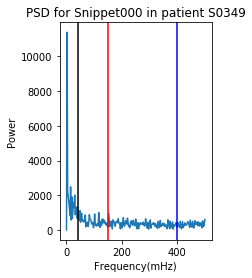

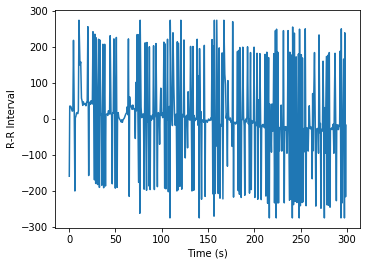

The SDNN is 133.9475729695383
The RMSSD is 227.0845477553223
The PNN50 is 34.05172413793103 %
The absolute power of the Low Frequency band is 148.7991570172434
New formula being used
The absolute power of the High Frequency band is 656.9458297594022
The LF/HF is 0.22650141043096225



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


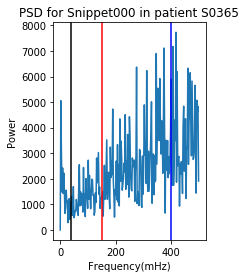

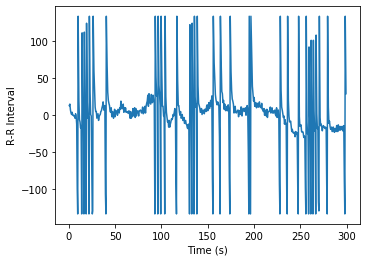

The SDNN is 52.36899878765723
The RMSSD is 77.9403945063118
The PNN50 is 6.5439672801636 %
The absolute power of the Low Frequency band is 81.27644923304265
New formula being used
The absolute power of the High Frequency band is 287.4835324307823
The LF/HF is 0.2827168865841443



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


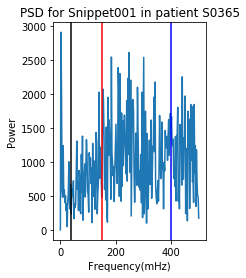

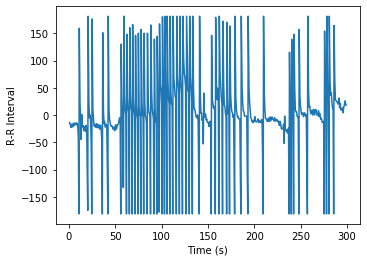




 53%|███████████████████████████████████████████▏                                      | 30/57 [00:27<00:26,  1.00it/s]

The SDNN is 83.65453003556254
The RMSSD is 132.83861833350252
The PNN50 is 10.58091286307054 %
The absolute power of the Low Frequency band is 87.12615131004418
New formula being used
The absolute power of the High Frequency band is 459.35212509974235
The LF/HF is 0.1896718150397712



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


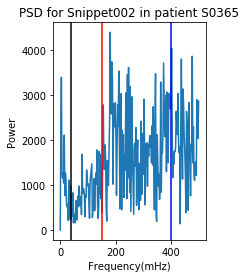

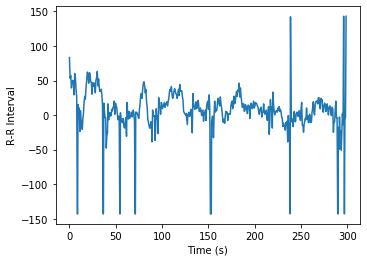

The SDNN is 35.8992045646213
The RMSSD is 36.581420783709305
The PNN50 is 2.882483370288248 %
The absolute power of the Low Frequency band is 83.15994391346102
New formula being used
The absolute power of the High Frequency band is 124.33123725811046
The LF/HF is 0.6688580098404536



In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


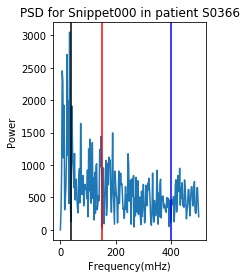

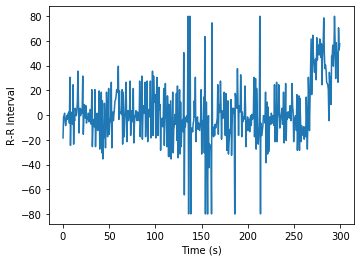




 54%|████████████████████████████████████████████▌                                     | 31/57 [00:28<00:25,  1.01it/s]

The SDNN is 24.346274959909817
The RMSSD is 30.062047137062923
The PNN50 is 2.495201535508637 %
The absolute power of the Low Frequency band is 35.01221907093813
New formula being used
The absolute power of the High Frequency band is 99.99956300011323
The LF/HF is 0.35012372074964454



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


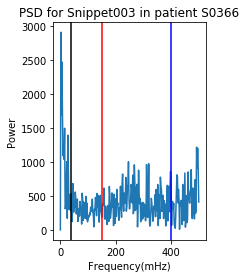

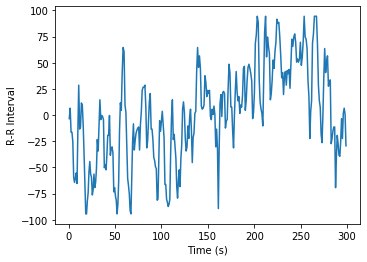

The SDNN is 45.578161805566
The RMSSD is 21.099390189327043
The PNN50 is 0.641025641025641 %
The absolute power of the Low Frequency band is 93.70254610984705
New formula being used
The absolute power of the High Frequency band is 55.118145594790356
The LF/HF is 1.70003081741385



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


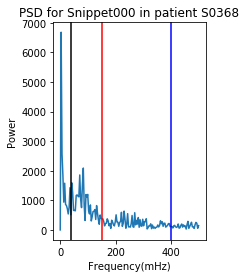

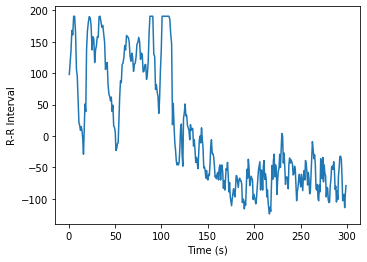

The SDNN is 92.0100656767787
The RMSSD is 21.63563170310326
The PNN50 is 1.0810810810810811 %
The absolute power of the Low Frequency band is 110.75414428323366
New formula being used
The absolute power of the High Frequency band is 63.97764854584188
The LF/HF is 1.7311380896388373



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


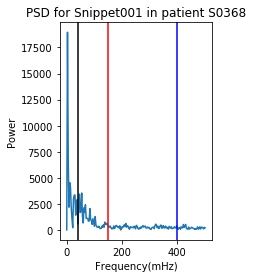

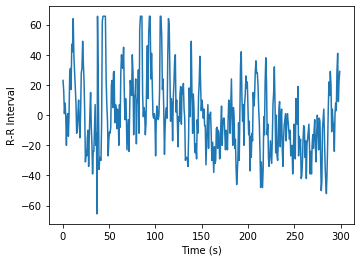




 56%|██████████████████████████████████████████████                                    | 32/57 [00:29<00:28,  1.15s/it]

The SDNN is 24.922931341478453
The RMSSD is 20.03407642163436
The PNN50 is 0.7194244604316548 %
The absolute power of the Low Frequency band is 67.95464322558588
New formula being used
The absolute power of the High Frequency band is 64.897839033745
The LF/HF is 1.0471017870140704



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


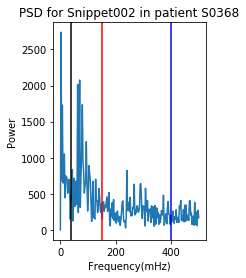

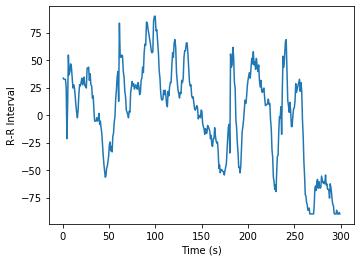

The SDNN is 44.12892034872586
The RMSSD is 11.430078295694415
The PNN50 is 0.5221932114882507 %
The absolute power of the Low Frequency band is 56.003290750753905
New formula being used
The absolute power of the High Frequency band is 36.85435256329969
The LF/HF is 1.519584169999044



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


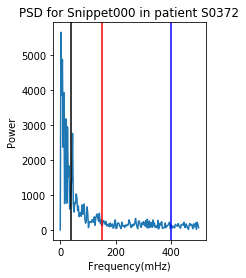

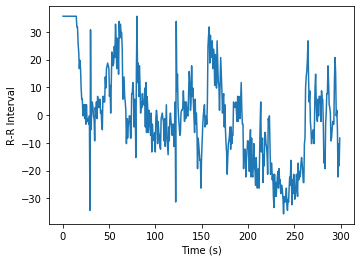

The SDNN is 16.64010302648178
The RMSSD is 8.915269225735114
The PNN50 is 0.423728813559322 %
The absolute power of the Low Frequency band is 26.629219357980254
New formula being used
The absolute power of the High Frequency band is 28.668142281426725
The LF/HF is 0.9288784427176703



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


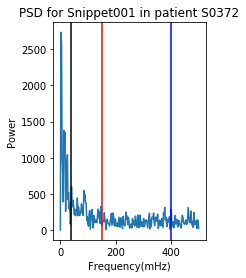

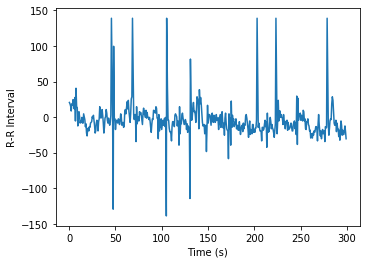




 58%|███████████████████████████████████████████████▍                                  | 33/57 [00:31<00:29,  1.21s/it]

The SDNN is 24.148121656170595
The RMSSD is 33.67368713318182
The PNN50 is 2.9535864978902953 %
The absolute power of the Low Frequency band is 48.66535684160661
New formula being used
The absolute power of the High Frequency band is 113.50351882260338
The LF/HF is 0.42875637113653314



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


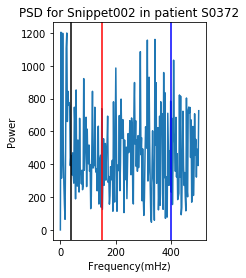

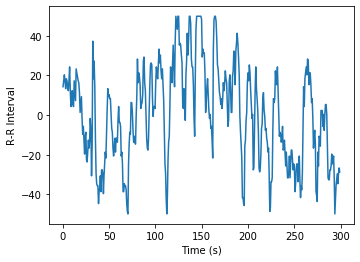

The SDNN is 24.18347912479983
The RMSSD is 10.01821354076005
The PNN50 is 0.46403712296983757 %
The absolute power of the Low Frequency band is 52.78720873664353
New formula being used
The absolute power of the High Frequency band is 33.47734707176068
The LF/HF is 1.5768038197139997



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


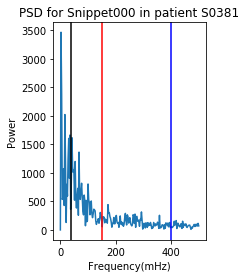

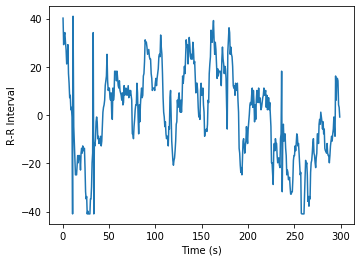

The SDNN is 18.315939413443882
The RMSSD is 8.688436149886337
The PNN50 is 0.20876826722338201 %
The absolute power of the Low Frequency band is 24.32209752055241
New formula being used
The absolute power of the High Frequency band is 28.975079582139927
The LF/HF is 0.8394143474775618



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


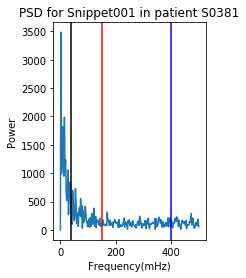

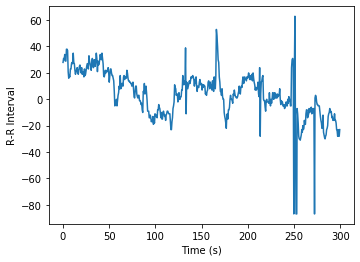




 60%|████████████████████████████████████████████████▉                                 | 34/57 [00:32<00:28,  1.25s/it]

The SDNN is 19.30118854020884
The RMSSD is 12.018280202140685
The PNN50 is 0.5847953216374269 %
The absolute power of the Low Frequency band is 37.72413050477852
New formula being used
The absolute power of the High Frequency band is 53.32371043945247
The LF/HF is 0.70745509256362



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


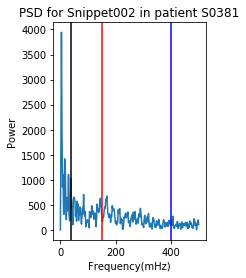

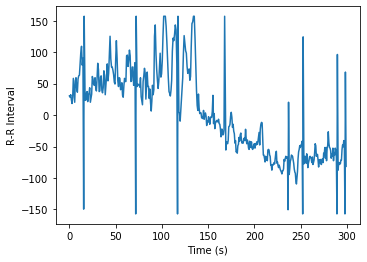




 61%|██████████████████████████████████████████████████▎                               | 35/57 [00:33<00:22,  1.04s/it]

The SDNN is 68.59729777695334
The RMSSD is 49.42758924076812
The PNN50 is 2.0454545454545454 %
The absolute power of the Low Frequency band is 77.26029650797375
New formula being used
The absolute power of the High Frequency band is 136.7049801377596
The LF/HF is 0.5651608041646867



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


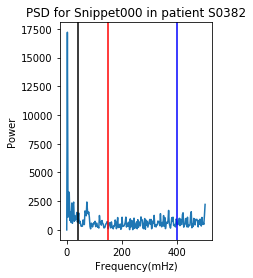

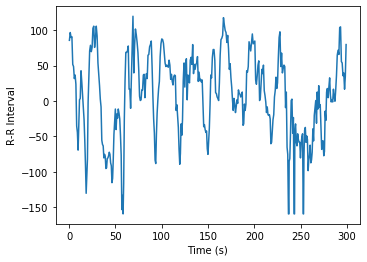

The SDNN is 59.76064236235095
The RMSSD is 27.485507488271807
The PNN50 is 2.4324324324324325 %
The absolute power of the Low Frequency band is 130.0779289159223
New formula being used
The absolute power of the High Frequency band is 78.10742135750128
The LF/HF is 1.665372209902432



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


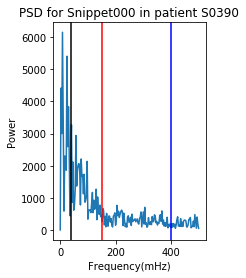

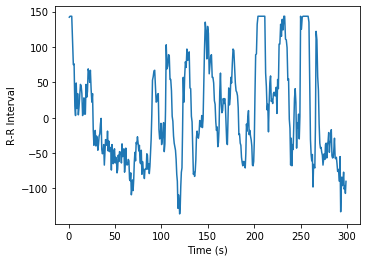

The SDNN is 67.70026805793582
The RMSSD is 26.1776486198135
The PNN50 is 2.696078431372549 %
The absolute power of the Low Frequency band is 127.4279470301629
New formula being used
The absolute power of the High Frequency band is 89.30043319000379
The LF/HF is 1.4269577702835496



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


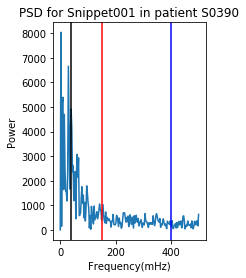

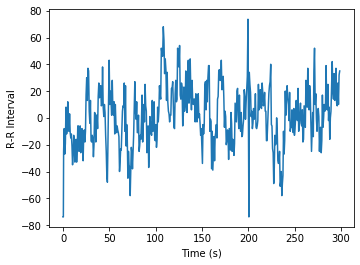




 63%|███████████████████████████████████████████████████▊                              | 36/57 [00:34<00:23,  1.11s/it]

The SDNN is 22.193659727620826
The RMSSD is 19.04948559518117
The PNN50 is 0.21834061135371177 %
The absolute power of the Low Frequency band is 54.29372283687349
New formula being used
The absolute power of the High Frequency band is 68.05248572381262
The LF/HF is 0.7978213030633688



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


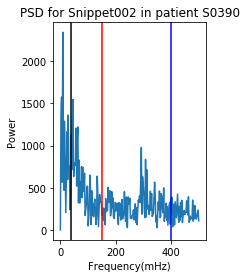

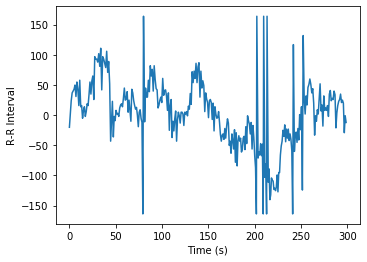

The SDNN is 56.365006220689665
The RMSSD is 60.50124955486568
The PNN50 is 3.618421052631579 %
The absolute power of the Low Frequency band is 46.964698906421695
New formula being used
The absolute power of the High Frequency band is 145.82546662380466
The LF/HF is 0.32206102263042674



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


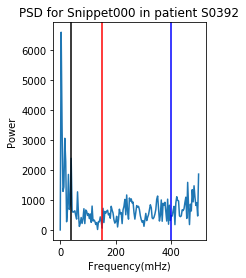

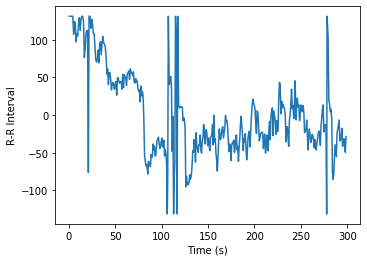

The SDNN is 56.24704814670226
The RMSSD is 36.793528205990384
The PNN50 is 1.2853470437017995 %
The absolute power of the Low Frequency band is 78.71144481873831
New formula being used
The absolute power of the High Frequency band is 124.96251591380698
The LF/HF is 0.6298804424922879



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


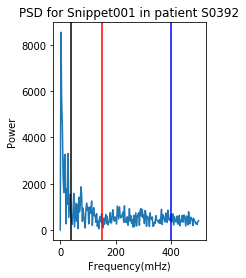

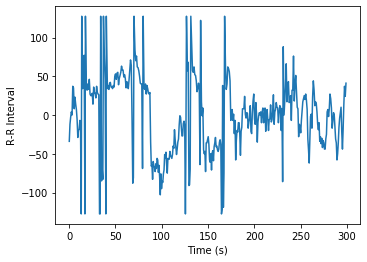




 65%|█████████████████████████████████████████████████████▏                            | 37/57 [00:35<00:22,  1.13s/it]

The SDNN is 49.16050063654384
The RMSSD is 51.08722993118434
The PNN50 is 3.5532994923857872 %
The absolute power of the Low Frequency band is 87.4847439498824
New formula being used
The absolute power of the High Frequency band is 170.37493570167447
The LF/HF is 0.5134836505709248



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


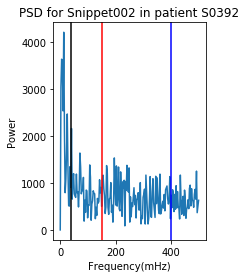

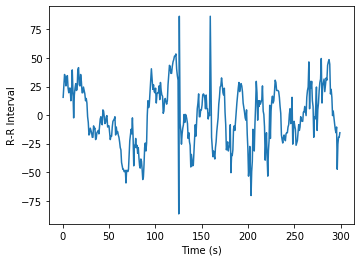

The SDNN is 25.8509952164489
The RMSSD is 17.090432688941274
The PNN50 is 0.4878048780487805 %
The absolute power of the Low Frequency band is 33.462125994612634
New formula being used
The absolute power of the High Frequency band is 52.311070216089945
The LF/HF is 0.6396758058358417



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


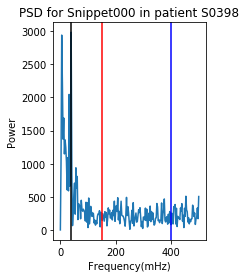

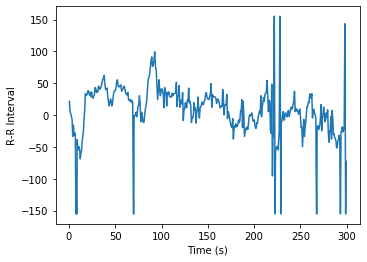




 67%|██████████████████████████████████████████████████████▋                           | 38/57 [00:36<00:19,  1.05s/it]

The SDNN is 41.991802049099654
The RMSSD is 40.171753805254326
The PNN50 is 3.110047846889952 %
The absolute power of the Low Frequency band is 68.55292359108041
New formula being used
The absolute power of the High Frequency band is 128.67644073480983
The LF/HF is 0.5327542726516784



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


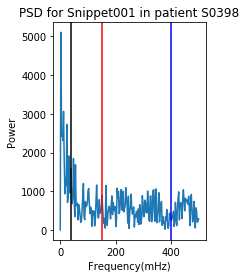

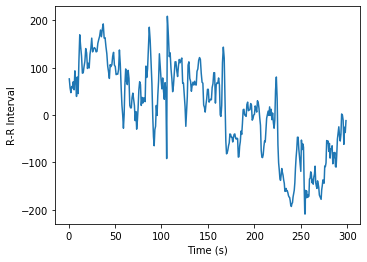

The SDNN is 97.44389709288691
The RMSSD is 30.708249073880555
The PNN50 is 2.680965147453083 %
The absolute power of the Low Frequency band is 122.05258797787165
New formula being used
The absolute power of the High Frequency band is 96.09730774995472
The LF/HF is 1.270093729321248



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


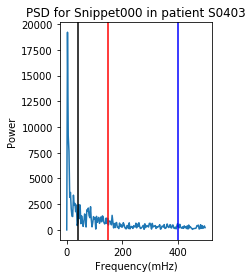

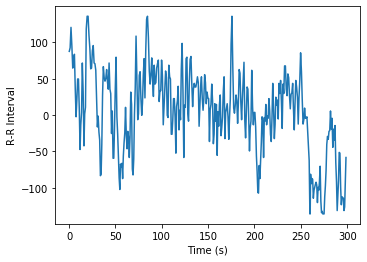

The SDNN is 58.70886229253201
The RMSSD is 33.875341987038404
The PNN50 is 5.8495821727019495 %
The absolute power of the Low Frequency band is 104.31518302765879
New formula being used
The absolute power of the High Frequency band is 106.54938995429347
The LF/HF is 0.9790312555745923



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


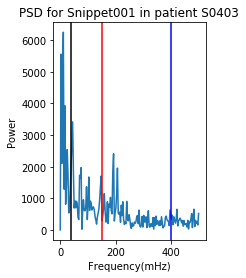

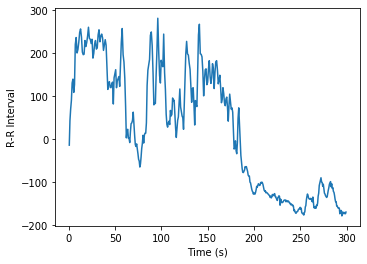

The SDNN is 140.7079401808938
The RMSSD is 24.22169713907881
The PNN50 is 4.358353510895883 %
The absolute power of the Low Frequency band is 120.55496735917023
New formula being used
The absolute power of the High Frequency band is 69.7259768478645
The LF/HF is 1.728982121286157



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


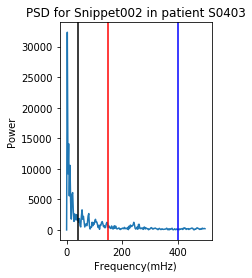

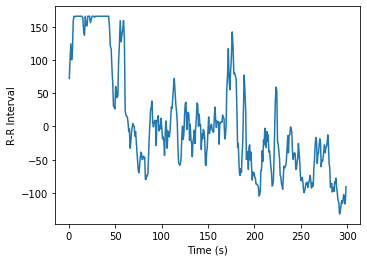

The SDNN is 78.53648034177509
The RMSSD is 19.001023954296734
The PNN50 is 0.7518796992481203 %
The absolute power of the Low Frequency band is 98.78278114976355
New formula being used
The absolute power of the High Frequency band is 63.810042624830295
The LF/HF is 1.5480757743817017



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


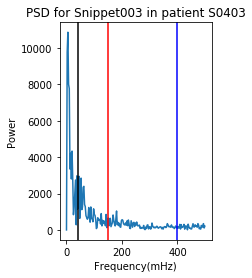

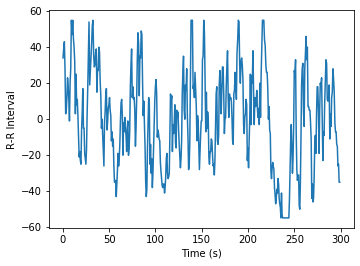




 68%|████████████████████████████████████████████████████████                          | 39/57 [00:38<00:25,  1.41s/it]

The SDNN is 26.370356818607696
The RMSSD is 13.586642670917538
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 60.52193471028192
New formula being used
The absolute power of the High Frequency band is 46.921174832953405
The LF/HF is 1.2898640097088214



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


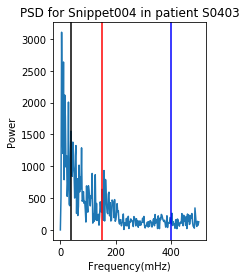

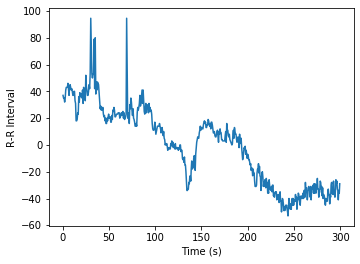

The SDNN is 28.945244580598814
The RMSSD is 7.393281654558097
The PNN50 is 0.1834862385321101 %
The absolute power of the Low Frequency band is 22.118504244134122
New formula being used
The absolute power of the High Frequency band is 27.28446364362719
The LF/HF is 0.8106629667723126



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


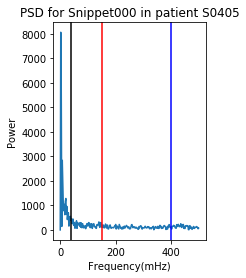

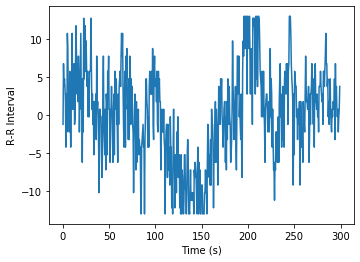

The SDNN is 6.136064007398878
The RMSSD is 5.053600300392646
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 12.14605454610767
New formula being used
The absolute power of the High Frequency band is 17.316955143455083
The LF/HF is 0.7013966627209434



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


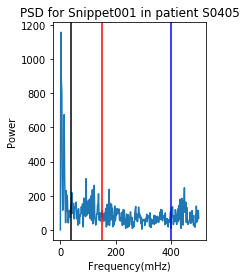

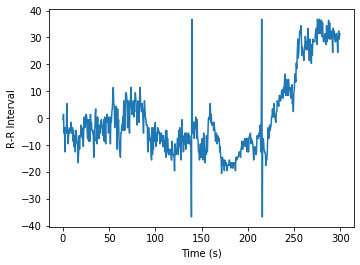




 70%|█████████████████████████████████████████████████████████▌                        | 40/57 [00:40<00:24,  1.42s/it]

The SDNN is 14.61530431942389
The RMSSD is 6.762829181714009
The PNN50 is 0.1724137931034483 %
The absolute power of the Low Frequency band is 12.243783127653776
New formula being used
The absolute power of the High Frequency band is 24.27002268110241
The LF/HF is 0.5044817340524064



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


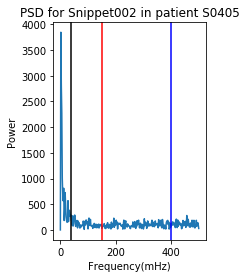

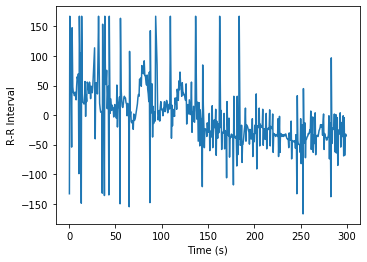




 72%|██████████████████████████████████████████████████████████▉                       | 41/57 [00:40<00:18,  1.14s/it]

The SDNN is 51.08207221697341
The RMSSD is 66.29100567450904
The PNN50 is 7.116104868913857 %
The absolute power of the Low Frequency band is 68.44398838816312
New formula being used
The absolute power of the High Frequency band is 205.79244027222614
The LF/HF is 0.33258747647690123



In snippet folder Snippet001
In snippet folder Snippet002
In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


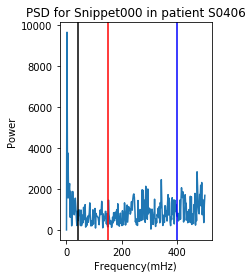

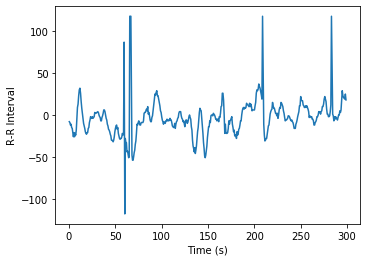




 74%|████████████████████████████████████████████████████████████▍                     | 42/57 [00:41<00:14,  1.04it/s]

The SDNN is 21.184991645131642
The RMSSD is 19.66079554469312
The PNN50 is 1.079913606911447 %
The absolute power of the Low Frequency band is 52.902866171428656
New formula being used
The absolute power of the High Frequency band is 74.58256649013568
The LF/HF is 0.7093194651383525



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


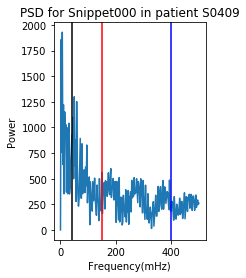

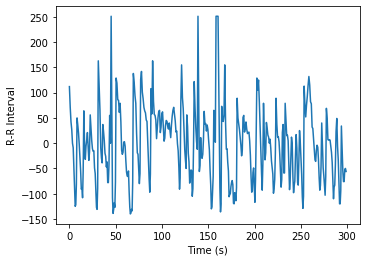

The SDNN is 71.80187422268646
The RMSSD is 61.25727715005404
The PNN50 is 11.025641025641026 %
The absolute power of the Low Frequency band is 202.1767156182149
New formula being used
The absolute power of the High Frequency band is 217.44003152356004
The LF/HF is 0.929804480810649



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


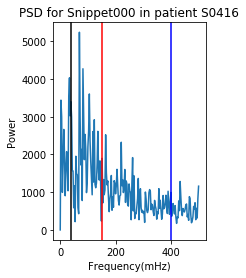

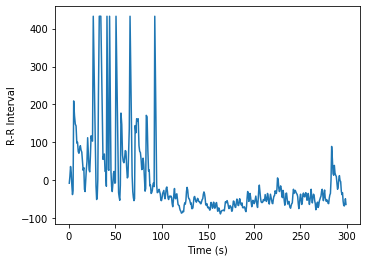

The SDNN is 82.08583157586018
The RMSSD is 77.18600124020125
The PNN50 is 3.8636363636363633 %
The absolute power of the Low Frequency band is 151.1123147829263
New formula being used
The absolute power of the High Frequency band is 275.6316614708306
The LF/HF is 0.5482400460693015



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


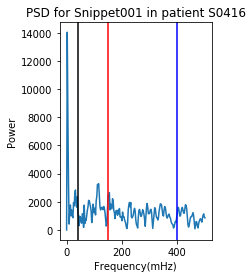

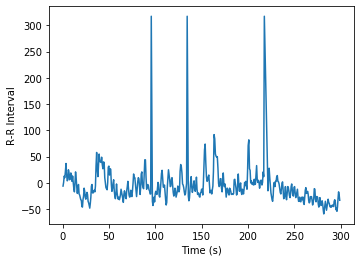

The SDNN is 34.95308815788294
The RMSSD is 39.605768027508965
The PNN50 is 0.8492569002123143 %
The absolute power of the Low Frequency band is 78.2088086381401
New formula being used
The absolute power of the High Frequency band is 143.14064505834253
The LF/HF is 0.5463773661650264



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


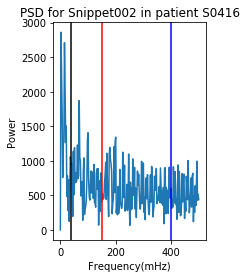

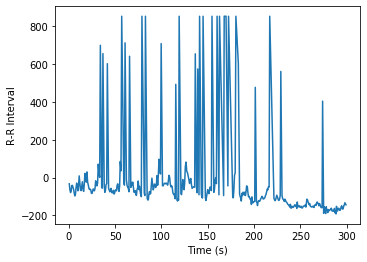

The SDNN is 213.46391683925717
The RMSSD is 283.9961272780535
The PNN50 is 8.27250608272506 %
The absolute power of the Low Frequency band is 323.6463974835775
New formula being used
The absolute power of the High Frequency band is 857.7203725395995
The LF/HF is 0.3773332286900243



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


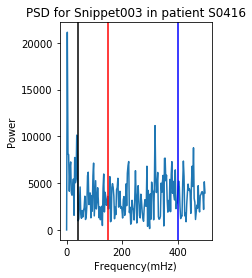

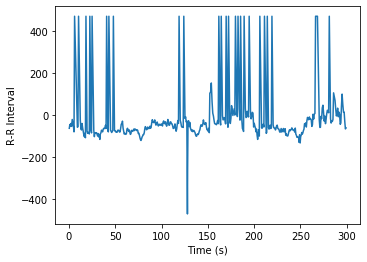




 77%|███████████████████████████████████████████████████████████████▎                  | 44/57 [00:43<00:13,  1.01s/it]

The SDNN is 131.57715229923613
The RMSSD is 177.84385692589643
The PNN50 is 7.780320366132723 %
The absolute power of the Low Frequency band is 254.58439502207847
New formula being used
The absolute power of the High Frequency band is 625.6816572089086
The LF/HF is 0.4068912554632801



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


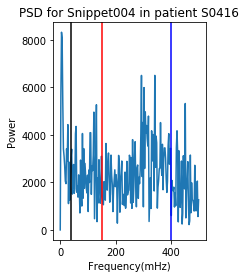

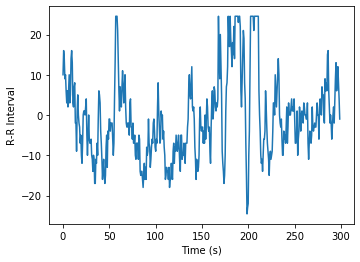

The SDNN is 10.352887940485468
The RMSSD is 4.898896981137136
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 22.24353157908246
New formula being used
The absolute power of the High Frequency band is 16.66878822952027
The LF/HF is 1.3344420285866594



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


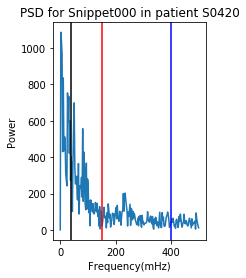

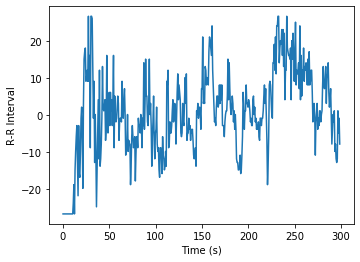

The SDNN is 11.377421933749815
The RMSSD is 7.53104900239977
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 16.59826887313166
New formula being used
The absolute power of the High Frequency band is 25.09617717733681
The LF/HF is 0.6613863440572448



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


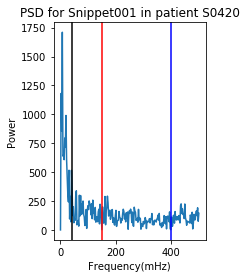

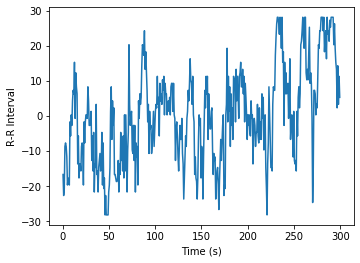

The SDNN is 13.522595737056488
The RMSSD is 8.511608665069446
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 22.051382980540716
New formula being used
The absolute power of the High Frequency band is 25.16743861486343
The LF/HF is 0.8761870175981108



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


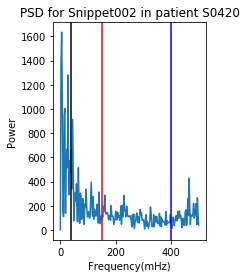

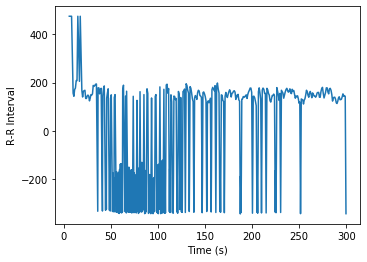

The SDNN is 210.7345635489651
The RMSSD is 202.76269891064732
The PNN50 is 27.740492170022375 %
The absolute power of the Low Frequency band is 446.61872319099643
New formula being used
The absolute power of the High Frequency band is 673.083549961471
The LF/HF is 0.6635412843124185



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


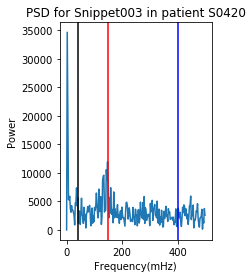

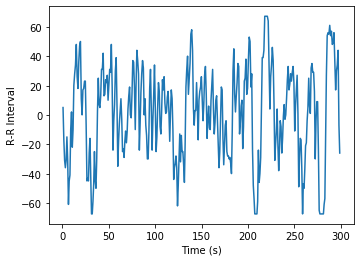




 79%|████████████████████████████████████████████████████████████████▋                 | 45/57 [00:45<00:16,  1.39s/it]

The SDNN is 31.294721977128802
The RMSSD is 18.49854601906574
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 52.18484015913363
New formula being used
The absolute power of the High Frequency band is 62.305491444486286
The LF/HF is 0.8375640565427515



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


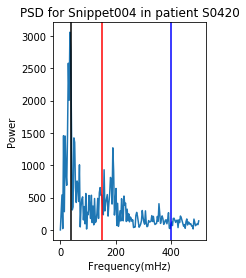

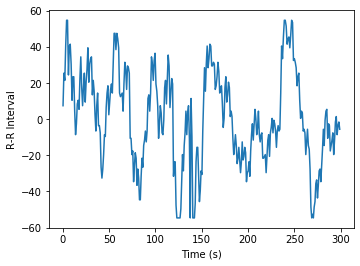

The SDNN is 26.020253574915596
The RMSSD is 11.808285158452923
The PNN50 is 0.3125 %
The absolute power of the Low Frequency band is 36.655836837036205
New formula being used
The absolute power of the High Frequency band is 32.49649591897197
The LF/HF is 1.127993520545578



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


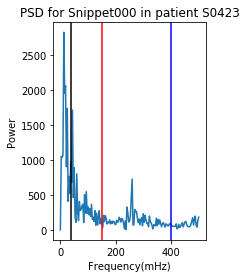

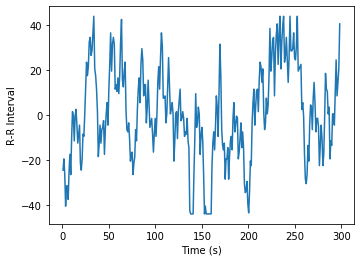

The SDNN is 20.851985526519115
The RMSSD is 10.659831669226914
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 37.9002336471259
New formula being used
The absolute power of the High Frequency band is 28.83919251672541
The LF/HF is 1.3141919152259725



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


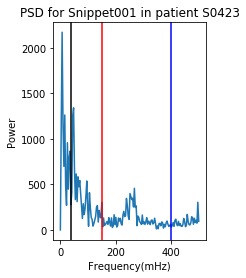

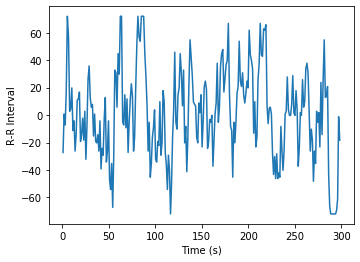

The SDNN is 32.46828623985092
The RMSSD is 24.530426016813202
The PNN50 is 1.171875 %
The absolute power of the Low Frequency band is 68.18943414751932
New formula being used
The absolute power of the High Frequency band is 60.503764298948724
The LF/HF is 1.1270279616090622



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


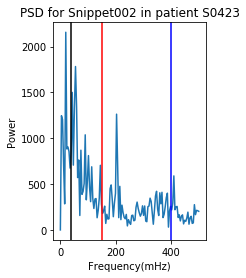

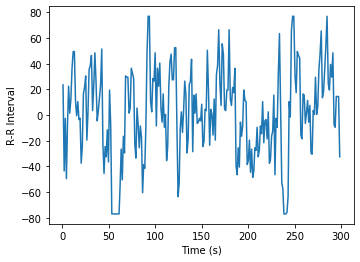

The SDNN is 34.89852661063174
The RMSSD is 28.97579126553552
The PNN50 is 2.4390243902439024 %
The absolute power of the Low Frequency band is 70.28225085262004
New formula being used
The absolute power of the High Frequency band is 74.66897310000358
The LF/HF is 0.9412510703541022



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


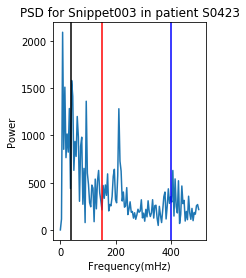

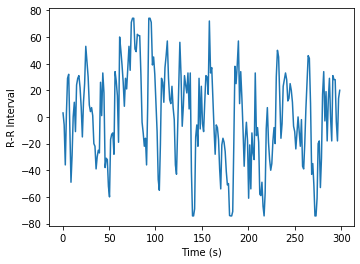




 81%|██████████████████████████████████████████████████████████████████▏               | 46/57 [00:47<00:16,  1.53s/it]

The SDNN is 35.15269752390995
The RMSSD is 25.386151722865357
The PNN50 is 3.6734693877551026 %
The absolute power of the Low Frequency band is 72.38226479454444
New formula being used
The absolute power of the High Frequency band is 60.8069632980244
The LF/HF is 1.190361446595971



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


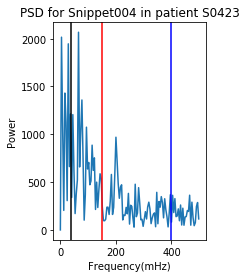

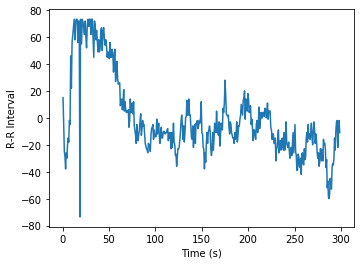

The SDNN is 29.142649664922033
The RMSSD is 13.50508310046437
The PNN50 is 0.4716981132075472 %
The absolute power of the Low Frequency band is 32.71906916880933
New formula being used
The absolute power of the High Frequency band is 42.75809687158426
The LF/HF is 0.7652134113235857



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


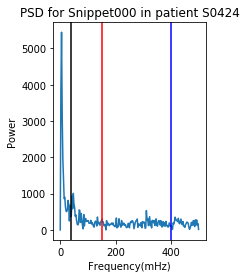

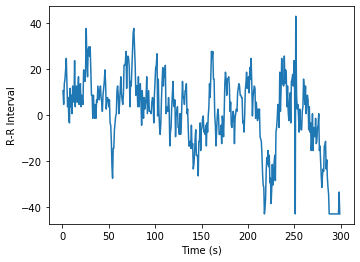




 82%|███████████████████████████████████████████████████████████████████▌              | 47/57 [00:48<00:13,  1.34s/it]

The SDNN is 16.699540001752293
The RMSSD is 9.22856371805093
The PNN50 is 0.2288329519450801 %
The absolute power of the Low Frequency band is 27.550024074000486
New formula being used
The absolute power of the High Frequency band is 30.01027751792281
The LF/HF is 0.9180196370242493



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


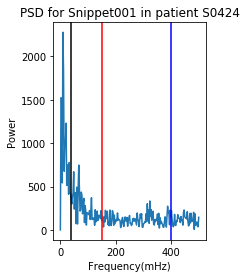

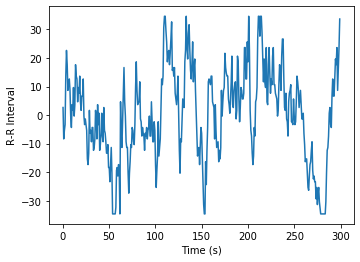

The SDNN is 16.01809646733445
The RMSSD is 7.452409728002115
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 24.66878813157148
New formula being used
The absolute power of the High Frequency band is 25.475798594202942
The LF/HF is 0.9683224665304466



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


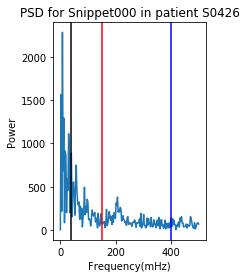

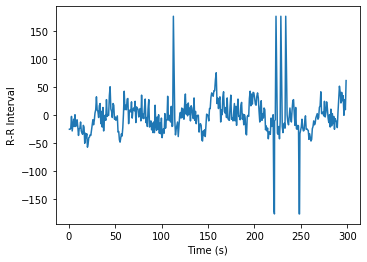

The SDNN is 33.89273559352233
The RMSSD is 37.376203562558864
The PNN50 is 1.804123711340206 %
The absolute power of the Low Frequency band is 67.71468898084834
New formula being used
The absolute power of the High Frequency band is 128.77012943244966
The LF/HF is 0.5258571167032193



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


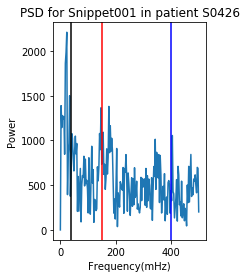

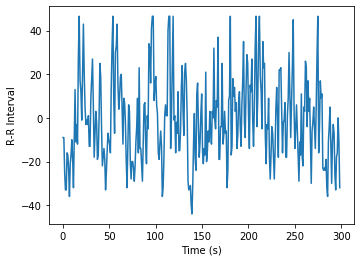

The SDNN is 19.635716498056983
The RMSSD is 18.536068896506677
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 37.32540482848372
New formula being used
The absolute power of the High Frequency band is 51.964469021015006
The LF/HF is 0.7182870436603309



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


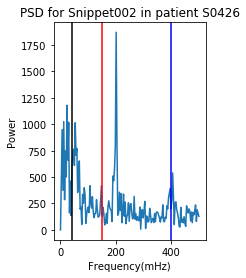

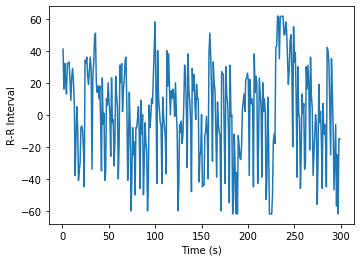

The SDNN is 29.717905367752905
The RMSSD is 30.409743984490877
The PNN50 is 7.598784194528875 %
The absolute power of the Low Frequency band is 45.57953712367932
New formula being used
The absolute power of the High Frequency band is 80.79930978517348
The LF/HF is 0.5641080009824921



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


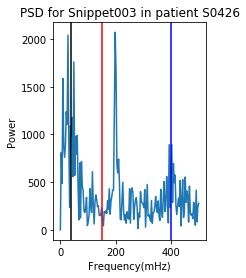

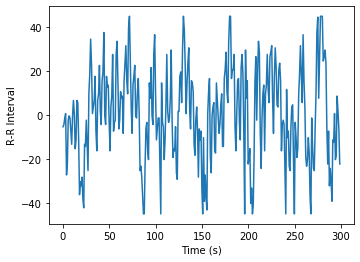




 84%|█████████████████████████████████████████████████████████████████████             | 48/57 [00:50<00:14,  1.60s/it]

The SDNN is 21.00126355948874
The RMSSD is 18.123673747727445
The PNN50 is 0.9433962264150944 %
The absolute power of the Low Frequency band is 36.379820374054724
New formula being used
The absolute power of the High Frequency band is 48.340881263140844
The LF/HF is 0.7525684146307394



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


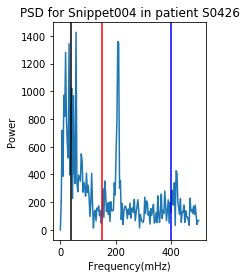

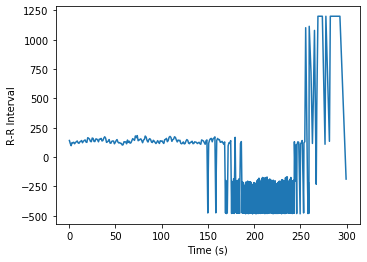

The SDNN is 326.91004576798673
The RMSSD is 294.8305080192621
The PNN50 is 25.068119891008173 %
The absolute power of the Low Frequency band is 373.65390077003633
New formula being used
The absolute power of the High Frequency band is 792.1768650283907
The LF/HF is 0.47167989531813076



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


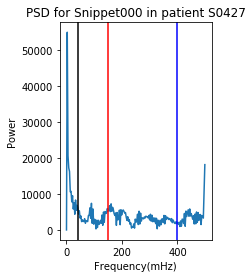

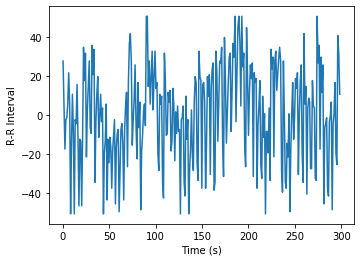

The SDNN is 24.497086524606427
The RMSSD is 30.299844447730678
The PNN50 is 4.745762711864407 %
The absolute power of the Low Frequency band is 33.86314209103644
New formula being used
The absolute power of the High Frequency band is 73.80526479471446
The LF/HF is 0.4588174324043823



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


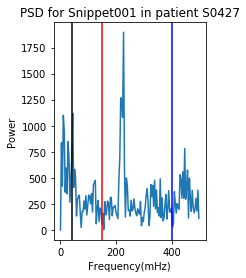

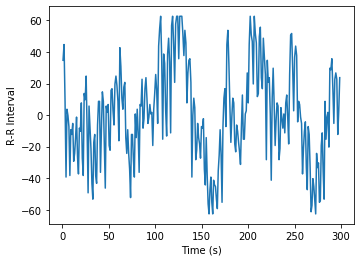

The SDNN is 30.443264536432036
The RMSSD is 23.73994847977779
The PNN50 is 3.8461538461538463 %
The absolute power of the Low Frequency band is 29.72442600148467
New formula being used
The absolute power of the High Frequency band is 64.08978174373553
The LF/HF is 0.4637935282778536



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


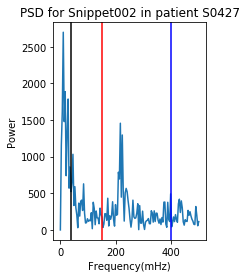

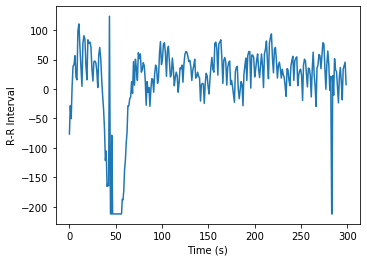

The SDNN is 73.61406667965792
The RMSSD is 43.38836505508203
The PNN50 is 6.440677966101695 %
The absolute power of the Low Frequency band is 73.98608819478548
New formula being used
The absolute power of the High Frequency band is 126.14563071948301
The LF/HF is 0.586513284469697



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


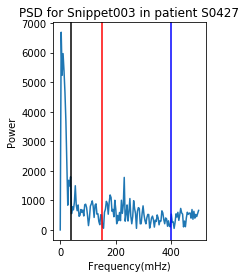

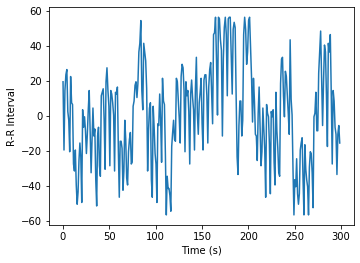




 86%|██████████████████████████████████████████████████████████████████████▍           | 49/57 [00:52<00:14,  1.75s/it]

The SDNN is 27.638973457740644
The RMSSD is 23.00620656148844
The PNN50 is 3.4013605442176873 %
The absolute power of the Low Frequency band is 38.68601453638193
New formula being used
The absolute power of the High Frequency band is 57.627195650557105
The LF/HF is 0.6713152375307012



In snippet folder Snippet000
In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


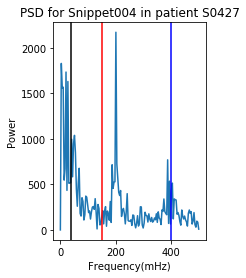

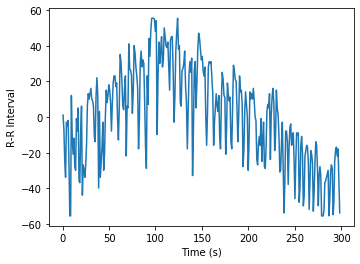

The SDNN is 26.793883157628823
The RMSSD is 17.80129181901666
The PNN50 is 0.6191950464396285 %
The absolute power of the Low Frequency band is 39.69023736965535
New formula being used
The absolute power of the High Frequency band is 61.904627606548644
The LF/HF is 0.6411513792138002



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


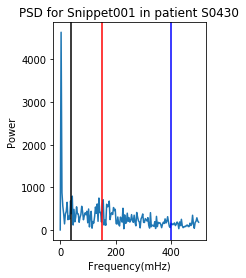

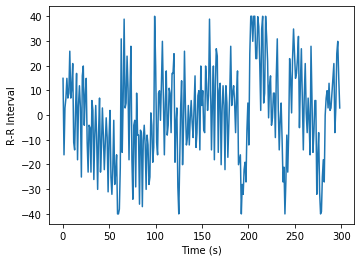

The SDNN is 18.837896935240632
The RMSSD is 19.265834431904434
The PNN50 is 0.6920415224913495 %
The absolute power of the Low Frequency band is 28.75995127704642
New formula being used
The absolute power of the High Frequency band is 53.558858140931555
The LF/HF is 0.5369784247709167



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


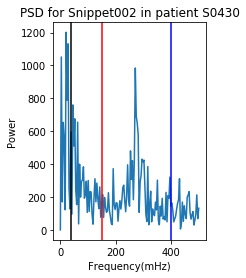

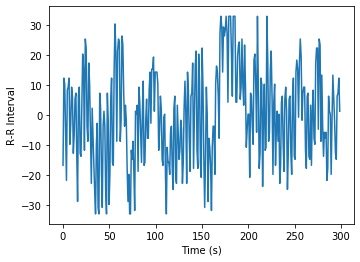

The SDNN is 15.955289241036615
The RMSSD is 16.95265325349575
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 17.156782569988575
New formula being used
The absolute power of the High Frequency band is 53.77915284984311
The LF/HF is 0.3190229235832715



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


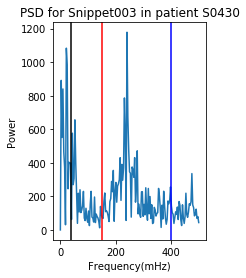

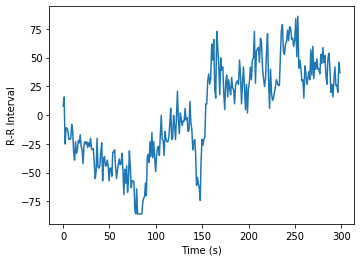




 88%|███████████████████████████████████████████████████████████████████████▉          | 50/57 [00:54<00:11,  1.71s/it]

The SDNN is 41.98460708221267
The RMSSD is 15.583991113431273
The PNN50 is 0.3472222222222222 %
The absolute power of the Low Frequency band is 27.29886701732437
New formula being used
The absolute power of the High Frequency band is 45.25675327460368
The LF/HF is 0.6031998550952931



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


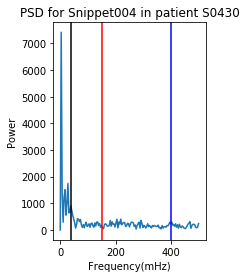

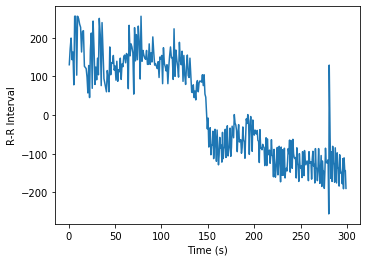

The SDNN is 126.34604427327656
The RMSSD is 58.70043013739635
The PNN50 is 15.890410958904111 %
The absolute power of the Low Frequency band is 87.43698371312138
New formula being used
The absolute power of the High Frequency band is 180.4117007248693
The LF/HF is 0.48465251068423865



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


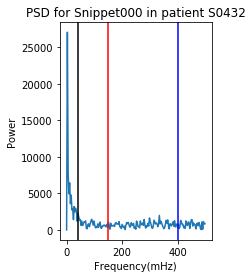

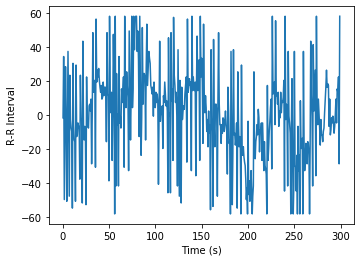

The SDNN is 27.45126045833601
The RMSSD is 36.72576730101925
The PNN50 is 11.312217194570136 %
The absolute power of the Low Frequency band is 30.925104175842208
New formula being used
The absolute power of the High Frequency band is 116.09090458914812
The LF/HF is 0.26638696877492507



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


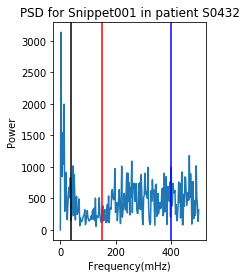

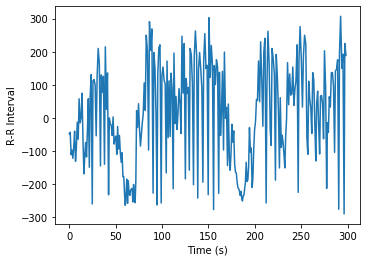

The SDNN is 153.31786814218097
The RMSSD is 182.51389715383576
The PNN50 is 32.29166666666667 %
The absolute power of the Low Frequency band is 140.62463218873535
New formula being used
The absolute power of the High Frequency band is 456.0351746511589
The LF/HF is 0.30836356492962463



In snippet folder Snippet003
In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


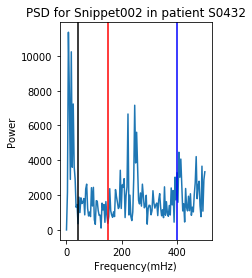

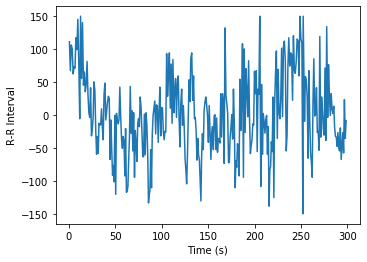




 89%|█████████████████████████████████████████████████████████████████████████▎        | 51/57 [00:55<00:10,  1.70s/it]

The SDNN is 60.97803070867829
The RMSSD is 67.5425331494163
The PNN50 is 19.018404907975462 %
The absolute power of the Low Frequency band is 103.4090336226385
New formula being used
The absolute power of the High Frequency band is 170.90944336614075
The LF/HF is 0.6050516085357814



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


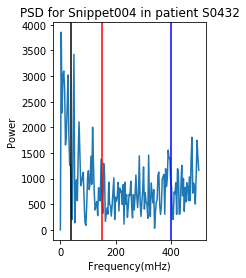

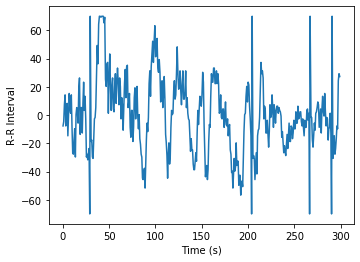

The SDNN is 26.12720771587372
The RMSSD is 21.651182420067826
The PNN50 is 0.9925558312655087 %
The absolute power of the Low Frequency band is 41.59865151192784
New formula being used
The absolute power of the High Frequency band is 65.22468925058304
The LF/HF is 0.6377746216944374



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


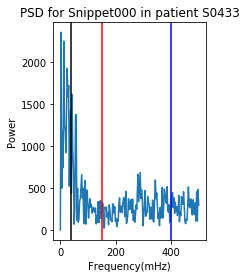

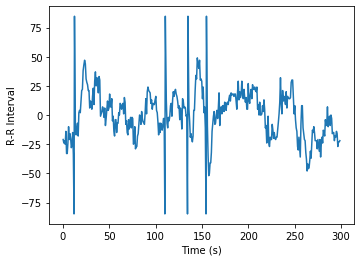

The SDNN is 22.159398705743904
The RMSSD is 22.51401001524006
The PNN50 is 1.0101010101010102 %
The absolute power of the Low Frequency band is 34.23490895387042
New formula being used
The absolute power of the High Frequency band is 68.46414073172801
The LF/HF is 0.500041460945483



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


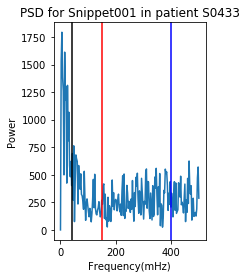

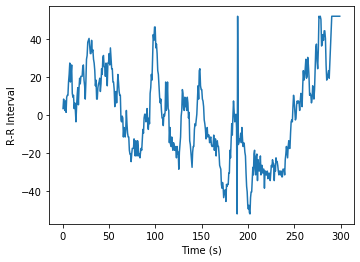

The SDNN is 24.19142488415063
The RMSSD is 8.402743973036639
The PNN50 is 0.21834061135371177 %
The absolute power of the Low Frequency band is 23.53180555832516
New formula being used
The absolute power of the High Frequency band is 27.947715053846427
The LF/HF is 0.8419938987136085



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


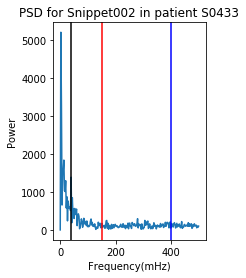

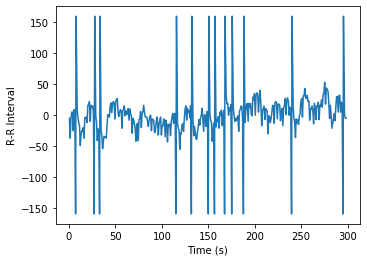

The SDNN is 45.35855432443712
The RMSSD is 73.83717843553455
The PNN50 is 3.3707865168539324 %
The absolute power of the Low Frequency band is 47.468134289132756
New formula being used
The absolute power of the High Frequency band is 191.68411049290532
The LF/HF is 0.2476372932898351



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


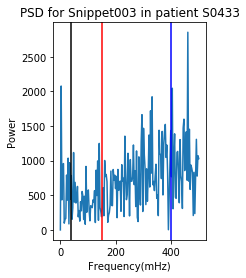

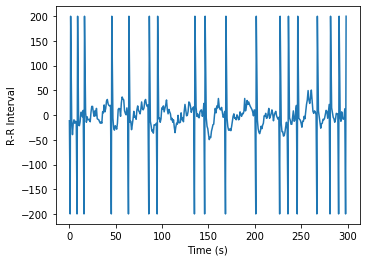




 91%|██████████████████████████████████████████████████████████████████████████▊       | 52/57 [00:58<00:09,  1.89s/it]

The SDNN is 65.45172739088947
The RMSSD is 110.6703418748151
The PNN50 is 5.027932960893855 %
The absolute power of the Low Frequency band is 54.458805768907176
New formula being used
The absolute power of the High Frequency band is 294.8015329722329
The LF/HF is 0.1847304022467095



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


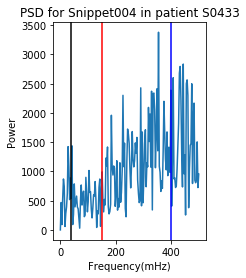

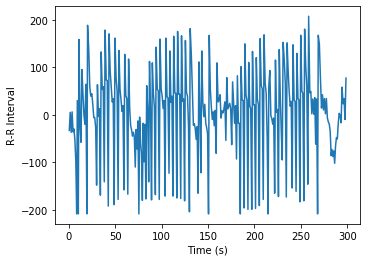

The SDNN is 99.04483566850642
The RMSSD is 156.76313325698226
The PNN50 is 20.0 %
The absolute power of the Low Frequency band is 94.1443416164299
New formula being used
The absolute power of the High Frequency band is 355.1796269848549
The LF/HF is 0.2650612097761009



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


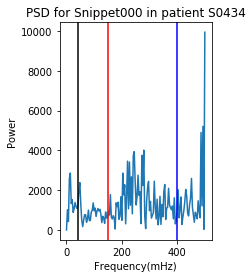

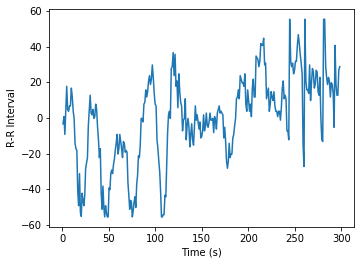

The SDNN is 24.803538193553614
The RMSSD is 12.109113572111546
The PNN50 is 0.9933774834437087 %
The absolute power of the Low Frequency band is 28.871090135212192
New formula being used
The absolute power of the High Frequency band is 33.01948088332849
The LF/HF is 0.8743653553254128



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


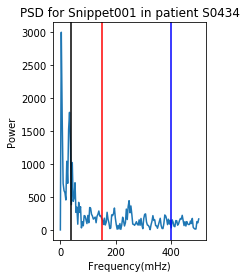

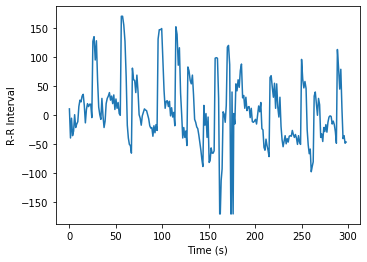

The SDNN is 58.73799837674276
The RMSSD is 49.840728588550526
The PNN50 is 6.896551724137931 %
The absolute power of the Low Frequency band is 133.94960451908668
New formula being used
The absolute power of the High Frequency band is 127.78146548192312
The LF/HF is 1.0482709993495587



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


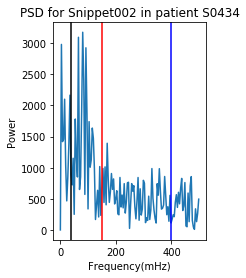

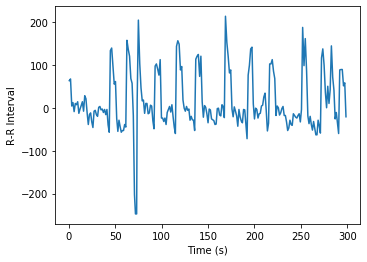

The SDNN is 69.62759453292912
The RMSSD is 56.24136767682783
The PNN50 is 6.3559322033898304 %
The absolute power of the Low Frequency band is 181.80821964035889
New formula being used
The absolute power of the High Frequency band is 126.40662071949465
The LF/HF is 1.4382808321710012



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


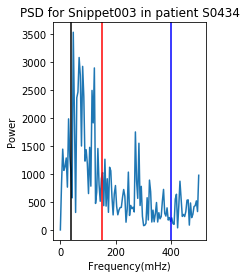

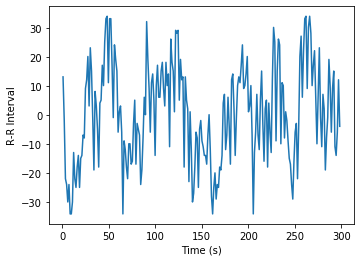




 93%|████████████████████████████████████████████████████████████████████████████▏     | 53/57 [01:00<00:07,  1.93s/it]

The SDNN is 16.670384416238992
The RMSSD is 14.102236106416624
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 22.760810266291674
New formula being used
The absolute power of the High Frequency band is 33.77597739155644
The LF/HF is 0.6738756958068542



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


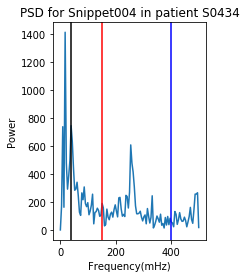

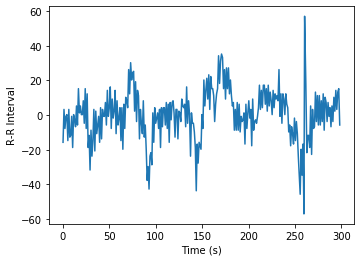

The SDNN is 14.5301334608477
The RMSSD is 16.116748692455232
The PNN50 is 0.34843205574912894 %
The absolute power of the Low Frequency band is 20.544659710067876
New formula being used
The absolute power of the High Frequency band is 31.659606408636005
The LF/HF is 0.6489234087402859



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


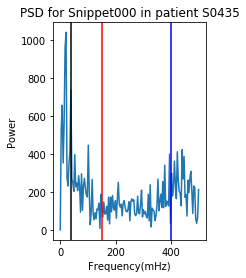

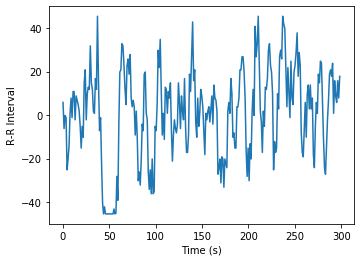

The SDNN is 20.442905985477676
The RMSSD is 13.444867229190182
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 42.49636711110925
New formula being used
The absolute power of the High Frequency band is 31.357893308554683
The LF/HF is 1.3552047866530594



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


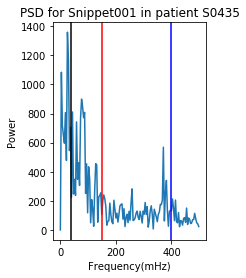

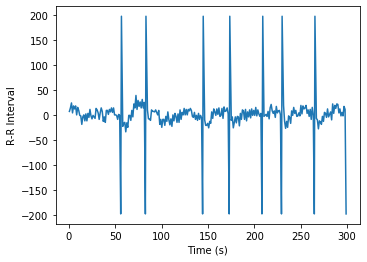

The SDNN is 48.143521947668326
The RMSSD is 80.76794862421849
The PNN50 is 2.5830258302583027 %
The absolute power of the Low Frequency band is 34.78331870720563
New formula being used
The absolute power of the High Frequency band is 180.94718984303387
The LF/HF is 0.1922291179950299



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


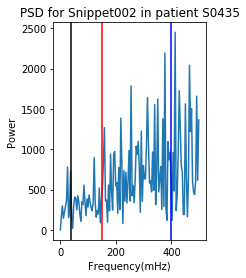

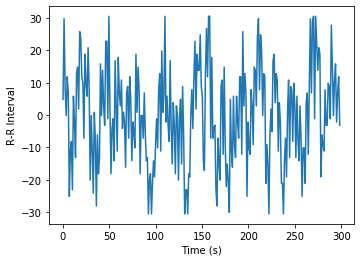

The SDNN is 14.759463878728187
The RMSSD is 16.529096558499095
The PNN50 is 0.0 %
The absolute power of the Low Frequency band is 29.506339301677595
New formula being used
The absolute power of the High Frequency band is 39.668728451388766
The LF/HF is 0.7438186312887628



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


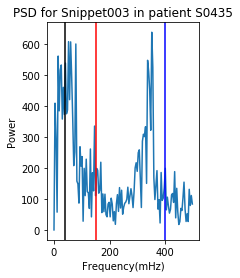

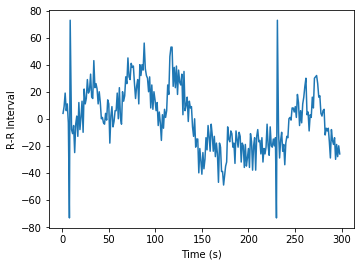




 95%|█████████████████████████████████████████████████████████████████████████████▋    | 54/57 [01:02<00:05,  1.92s/it]

The SDNN is 23.481340618281934
The RMSSD is 20.549363907287972
The PNN50 is 0.7604562737642585 %
The absolute power of the Low Frequency band is 24.474652054100538
New formula being used
The absolute power of the High Frequency band is 48.739222021640835
The LF/HF is 0.5021551645455785



In snippet folder Snippet000
<class 'pandas.core.frame.DataFrame'>


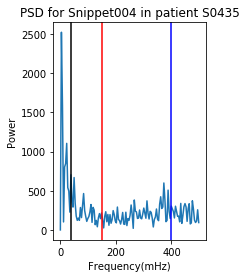

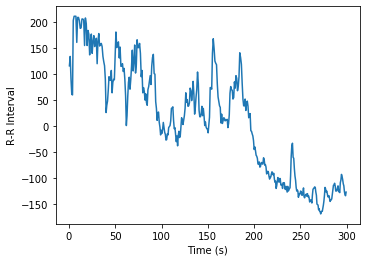

The SDNN is 105.71359647765321
The RMSSD is 19.387416939241124
The PNN50 is 0.9852216748768473 %
The absolute power of the Low Frequency band is 79.90412313881717
New formula being used
The absolute power of the High Frequency band is 82.9278913973828
The LF/HF is 0.9635373791903619



In snippet folder Snippet001
<class 'pandas.core.frame.DataFrame'>


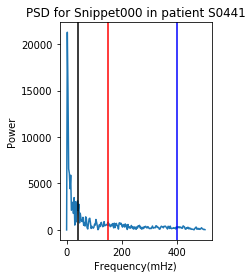

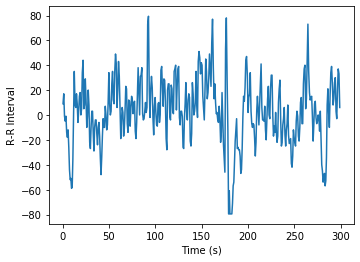

The SDNN is 26.739875942533445
The RMSSD is 18.570239019834666
The PNN50 is 0.5208333333333333 %
The absolute power of the Low Frequency band is 53.43761300371583
New formula being used
The absolute power of the High Frequency band is 65.76929133694306
The LF/HF is 0.8125009699427849



In snippet folder Snippet002
<class 'pandas.core.frame.DataFrame'>


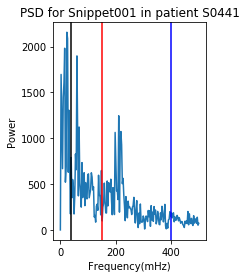

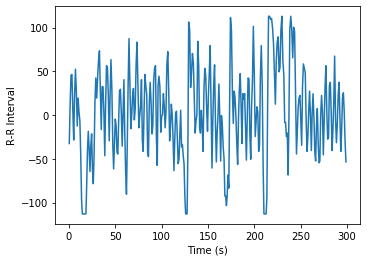

The SDNN is 50.879834292712424
The RMSSD is 39.25558215899883
The PNN50 is 9.717868338557993 %
The absolute power of the Low Frequency band is 115.69321241782416
New formula being used
The absolute power of the High Frequency band is 113.80042776691705
The LF/HF is 1.0166324915296792



In snippet folder Snippet003
<class 'pandas.core.frame.DataFrame'>


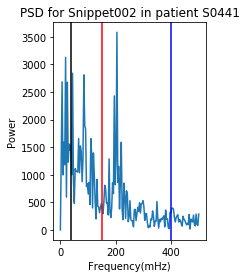

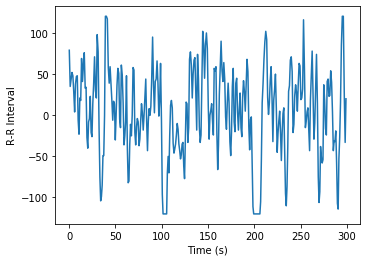

The SDNN is 54.48332893791675
The RMSSD is 36.86612139588576
The PNN50 is 7.64525993883792 %
The absolute power of the Low Frequency band is 125.43855121735997
New formula being used
The absolute power of the High Frequency band is 115.42383340779936
The LF/HF is 1.0867647305923207



In snippet folder Snippet004
<class 'pandas.core.frame.DataFrame'>


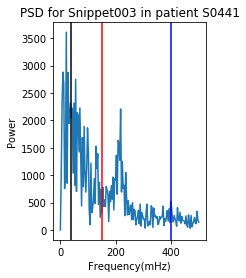

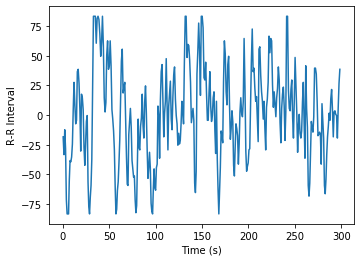




100%|██████████████████████████████████████████████████████████████████████████████████| 57/57 [01:04<00:00,  1.13s/it]

The SDNN is 39.44028328080847
The RMSSD is 24.87411123015783
The PNN50 is 3.2544378698224854 %
The absolute power of the Low Frequency band is 83.86973302592436
New formula being used
The absolute power of the High Frequency band is 76.66584039227843
The LF/HF is 1.093964829665801





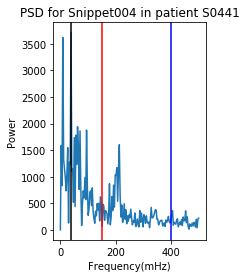

In [165]:
patients = sorted(os.listdir(root))
for pat in tqdm(patients):     #Looping throught the folder Sxxxx
    if not pat.endswith(('.json', 'ini','\r')):
        path_pat = root+'/'+pat
        folders = sorted(os.listdir(path_pat))
        for folder in folders:    #Looping through the different ecg types 
            if not folder.endswith('.ini') and folder != 'Icon\r':
                path_folder = path_pat + '/' +folder   
                snippets = sorted(os.listdir(path_folder))
                for snip_folder in snippets:  #Looping through the snippet folders
                    if not snip_folder.endswith(('.json', '.ftr', '.ini','\r')):
                        print("In snippet folder " + snip_folder)
                        
                        ### NOW IN CORRECT FOLDER ###
                        path_snip =path_folder + '/' + snip_folder
                        if _check_valid(path_snip):
                            para = _hrv_analysis(path_snip)
                            _save_parameters(para, path_snip)
                            print('\n\n')